In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from sod.jupyter.share import * # our user defined functions
# Print a nice doc of the module functions just imported (`printdoc` is defined in `share`)
printdoc()

When using the module share in a Jupyter Notebook, note the following naming
conventions: eval_df denotes an Evaluation Data frame, i.e. a
tabular object where a row is a model evaluation and columns report
evaluation info, e.g., model name, model hyperparams, testset file path,
some evaluation metrics scores. pred_df denotes a Prediction Data frame representing a model evaluation
in details: a row is a testset instance and columns
report several instance info, including the instance actual class as boolean
(column 'outlier') and the predicted class/score as float in [0, 1] (column
'predicted_anomaly_score') Given the above definitions, sod.jupyter.share imported the following functions/classes/modules that you can use in this Notebook: join Join two or more pathname components, inserting '/' as needed abspath Return an absolute path. dirname Returns the directory component of a pathname isfile Test whether a path is a regular file isdir Return true if the pathname refers to an existing directory. basename Returns the final component of a pathname splitext Split the extension from a pathname sys This module provides access to some objects used or maintained by the os OS routines for NT or Posix depending on what system we're on re Support for regular expressions (RE) time This module provides various functions to manipulate time values inspect Get useful information from live Python objects datetime datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]]) timedelta Difference between two datetime values contextlib Utilities for with-statement contexts Enum Generic enumeration defaultdict defaultdict(default_factory[, ...]) --> dict with default factory namedtuple Returns a new subclass of tuple with named fields np NumPy matplotlib This is an object-oriented plotting library plt `matplotlib.pyplot` is a state-based interface to matplotlib hmean Calculate the harmonic mean along the specified axis metrics The :mod:`sklearn.metrics` module includes score functions, performance metrics dump Persist an arbitrary Python object into one file load Reconstruct a Python object from a file persisted with joblib.dump display Display a Python object in all frontends display_html Display the HTML representation of an object clear_output Clear the output of the current cell receiving output pd pandas - a powerful data analysis and manipulation library for Python cycle cycle(iterable) --> cycle object importlib A pure Python implementation of import. printhtml Same as display_html(text, True): prints the html formatted text
passed as argument EVALMETRICS Evaluation metrics enumeration. Each enum item is mapped to a string:
 AUC = 'roc_auc_score'
 APS = 'average_precision_score'
 LOGLOSS = 'log_loss'
 F1MAX = 'f1_max' (F1score at BEST_TH_PR )
 PMAX = 'p_max' (Precision at BEST_TH_PR )
 RMAX = 'r_max' (Recall at BEST_TH_PR )
 BEST_TH_PR 
 and has a compute method
(e.g., EVALMETRICS.APS.compute(pred_df) ) which
returns the metric scalar value from a prediction dataframe read_summary_eval_df read_summary_eval_df(**kwargs) = pandas
 read_hdf('../evaluations/results/summary_evaluationmetrics.hdf', **kwargs) 
reads and returns the Evaluation dataframe created and incremented by each
execution of the main script evaluate.py . *Thus, if no
evaluation has been run on this computer, no evaluation dataframe exists
and the Notebook using this module will not work.*
Keyword arguments of the functions are the same keyword arguments as pandas
 read_hdf . load_clf load_clf(relativepath) loads a classifier from a path relative to
the evaluation directory of this package (where evaluate.py saved
evaluation results) read_pred_df red_pred_df(relativepath, **kwargs) =
pandas read_hdf('../evaluations/results' + relativepath, **kwargs) 
reads and returns a Prediction dataframe created via the main script
 evaluate.py .
The keyword argument columns , if not specified, defaults to the minimal
 ('outlier', 'predicted_anomaly_score') . Pass None t

In [2]:
# matplotlib stuff. Note that rcParams need to be input from the second cell on
# (https://github.com/jupyter/notebook/issues/3385#issuecomment-376010658)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# for font size details, see https://stackoverflow.com/a/39566040
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 15
plt.rcParams['axes.titlesize'] = plt.rcParams['font.size']
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'helvetica,arial'

# pandas settings. Some are set in `share`, display max_rows is explicitly set here
pd.set_option('display.max_rows', 20)

TESTSETNAME = 'allset_test_AND_allset_unlabelled_annotation2.hdf'

In [3]:
eval_df = read_summary_eval_df()
eval_df = eval_df[eval_df.relative_filepath.str.endswith(os.sep + TESTSETNAME)]
printhtml('<h3>Loaded evaluations performed on testset "%s"</h3>' % TESTSETNAME)
display(eval_df)

Loaded evaluations performed on testset "allset_test_AND_allset_unlabelled_annotation2.hdf"

clf                                             feats  \
4212  IsolationForest  psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec   
4213  IsolationForest  psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec   
4214  IsolationForest  psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec   
4215  IsolationForest  psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec   
4216  IsolationForest  psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec   
4217  IsolationForest  psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec   
4218  IsolationForest  psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec   
4219  IsolationForest  psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec   
4220  IsolationForest  psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec   
4221  IsolationForest  psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec   
...               ...                                               ...   
5066  IsolationForest                                          psd@5sec   
5067  IsolationForest                                          psd@5sec   
5068  IsolationForest                                          psd@5sec   
5069  IsolationForest                                          psd@5sec   
5070  IsolationForest                                          psd@5sec   
5071  IsolationForest                                          psd@5sec   
5072  IsolationForest                                          psd@5sec   
5073  IsolationForest                                          psd@5sec   
5074  IsolationForest                                          psd@5sec   
5075  IsolationForest                                          psd@5sec   

      n_estimators  max_samples  random_state  roc_auc_score  \
4212           100         1024            25       0.912127   
4213            50         1024            11       0.936248   
4214           100         1024            11       0.933584   
4215           200         1024            11       0.940079   
4216            50         1024            25       0.921786   
4217           100         1024            42       0.938868   
4218           200         1024            42       0.941601   
4219           200         1024            25       0.927001   
4220            50         1024            42       0.929225   
4221           100        16384            11       0.957551   
...            ...          ...           ...            ...   
5066            50          512            42       0.966118   
5067           100         8192            11       0.973810   
5068           100         8192            25       0.972647   
5069           100         8192            42       0.973168   
5070           200         8192            11       0.973803   
5071           200         8192            25       0.973151   
5072           200         8192            42       0.973506   
5073            50         8192            11       0.973645   
5074            50         8192            25       0.972595   
5075            50         8192            42       0.972922   

      average_precision_score  log_loss  best_th_pr_curve behaviour  \
4212                 0.907182  0.589060          0.672498       new   
4213                 0.928889  0.579003          0.617879       new   
4214                 0.926675  0.579474          0.651558       new   
4215                 0.932091  0.576134          0.602329       new   
4216                 0.912394  0.591873          0.669661       new   
4217                 0.930568  0.573399          0.643035       new   
4218                 0.932390  0.579190          0.603606       new   
4219                 0.919704  0.585011          0.681058       new   
4220                 0.923209  0.577392          0.660588       new   
4221                 0.947573  0.521357          0.550396       new   
...                       ...       ...               ...       ...   
5066                 0.956370  0.664832          0.751356       new   
5067                 0.970347  0.58

In [4]:
mean = 'median'
for metric, _eval_df in rank_eval(eval_df,
                                  # evalmetrics=['roc_auc_score', 'average_precision_score', 'f1_max'],
                                  evalmetrics=['average_precision_score', 'roc_auc_score'],
                                  columns=['clf', 'feats', 'n_estimators', 'max_samples'],
                                  mean=mean).items():
    printhtml("<h3>Ranking models according to %s (for each group, showing %s on 'random_state')</h3>" % (metric, mean))
    display(_eval_df)

Ranking models according to average_precision_score (for each group, showing median on 'random_state')

clf                                             feats  \
285  IsolationForest                                          psd@5sec   
278  IsolationForest                                          psd@5sec   
284  IsolationForest                                          psd@5sec   
286  IsolationForest                                          psd@5sec   
273  IsolationForest                                          psd@5sec   
280  IsolationForest                                          psd@5sec   
279  IsolationForest                                          psd@5sec   
274  IsolationForest                                          psd@5sec   
287  IsolationForest                                          psd@5sec   
283  IsolationForest                                          psd@5sec   
..               ...                                               ...   
18   IsolationForest           psd@0.2sec,psd@0.5sec,psd@1sec,psd@5sec   
156  IsolationForest             psd@0.5sec,psd@1sec,psd@2sec,psd@5sec   
78   IsolationForest             psd@0.2sec,psd@1sec,psd@2sec,psd@5sec   
12   IsolationForest  psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec   
252  IsolationForest                                 psd@2sec,psd@5sec   
36   IsolationForest           psd@0.2sec,psd@0.5sec,psd@2sec,psd@5sec   
6    IsolationForest  psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec   
72   IsolationForest             psd@0.2sec,psd@1sec,psd@2sec,psd@5sec   
144  IsolationForest             psd@0.5sec,psd@1sec,psd@2sec,psd@5sec   
0    IsolationForest  psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec   

     n_estimators  max_samples  random_state  roc_auc_score  \
285           200         4096            25       0.974026   
278           100         2048            11       0.974035   
284           200         2048            11       0.973771   
286           200         8192            11       0.973803   
273            50         4096            11       0.974377   
280           100         8192            11       0.973810   
279           100         4096            11       0.973940   
274            50         8192            11       0.973645   
287           200        16384            11       0.973192   
283           200         1024            11       0.973538   
..            ...          ...           ...            ...   
18             50          512            11       0.929767   
156           200          512            11       0.927038   
78            100          512            11       0.919796   
12            200          512            11       0.928110   
252            50          512            11       0.958302   
36             50          512            11       0.930808   
6             100          512            25       0.901076   
72             50          512            11       0.921846   
144            50          512            11       0.926858   
0              50          512            11       0.927359   

     average_precision_score  log_loss  best_th_pr_curve behaviour  \
285                 0.970573  0.588646          0.718142       new   
278                 0.970464  0.610812          0.756818       new   
284                 0.970408  0.610380          0.746150       new   
286                 0.970302  0.579433          0.688365       new   
273                 0.970216  0.587202          0.726551       new   
280                 0.970154  0.582303          0.696299       new   
279                 0.970058  0.588319          0.726503       new   
274                 0.969730  0.582023          0.694817       new   
287                 0.969477  0.572371          0.668579       new   
283                 0.969215  0.632467          0.771159       new   
..                       ...       ...               ...       ...   
18                  0.913850  0.609631          0.662526       new   
156                 0.913562  0.612435          0.695334       new   
78                  0

Ranking models according to roc_auc_score (for each group, showing median on 'random_state')

clf                                             feats  \
273  IsolationForest                                          psd@5sec   
278  IsolationForest                                          psd@5sec   
285  IsolationForest                                          psd@5sec   
272  IsolationForest                                          psd@5sec   
279  IsolationForest                                          psd@5sec   
280  IsolationForest                                          psd@5sec   
286  IsolationForest                                          psd@5sec   
284  IsolationForest                                          psd@5sec   
274  IsolationForest                                          psd@5sec   
283  IsolationForest                                          psd@5sec   
..               ...                                               ...   
0    IsolationForest  psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec   
156  IsolationForest             psd@0.5sec,psd@1sec,psd@2sec,psd@5sec   
144  IsolationForest             psd@0.5sec,psd@1sec,psd@2sec,psd@5sec   
30   IsolationForest           psd@0.2sec,psd@0.5sec,psd@1sec,psd@5sec   
72   IsolationForest             psd@0.2sec,psd@1sec,psd@2sec,psd@5sec   
84   IsolationForest             psd@0.2sec,psd@1sec,psd@2sec,psd@5sec   
78   IsolationForest             psd@0.2sec,psd@1sec,psd@2sec,psd@5sec   
24   IsolationForest           psd@0.2sec,psd@0.5sec,psd@1sec,psd@5sec   
7    IsolationForest  psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec   
6    IsolationForest  psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec   

     n_estimators  max_samples  random_state  roc_auc_score  \
273            50         4096            11       0.974377   
278           100         2048            11       0.974035   
285           200         4096            25       0.974026   
272            50         2048            11       0.973979   
279           100         4096            11       0.973940   
280           100         8192            11       0.973810   
286           200         8192            11       0.973803   
284           200         2048            11       0.973771   
274            50         8192            11       0.973645   
283           200         1024            11       0.973538   
..            ...          ...           ...            ...   
0              50          512            11       0.927359   
156           200          512            11       0.927038   
144            50          512            11       0.926858   
30            200          512            11       0.923463   
72             50          512            11       0.921846   
84            200          512            25       0.921575   
78            100          512            11       0.919796   
24            100          512            11       0.919619   
7             100         1024            25       0.912127   
6             100          512            25       0.901076   

     average_precision_score  log_loss  best_th_pr_curve behaviour  \
273                 0.970216  0.587202          0.726551       new   
278                 0.970464  0.610812          0.756818       new   
285                 0.970573  0.588646          0.718142       new   
272                 0.969175  0.614826          0.757912       new   
279                 0.970058  0.588319          0.726503       new   
280                 0.970154  0.582303          0.696299       new   
286                 0.970302  0.579433          0.688365       new   
284                 0.970408  0.610380          0.746150       new   
274                 0.969730  0.582023          0.694817       new   
283                 0.969215  0.632467          0.771159       new   
..                       ...       ...               ...       ...   
0                   0.899932  0.599585          0.629197       new   
156                 0.913562  0.612435          0.695334       new   
144                 0

Evaluation metrics (all classifiers) by number of features

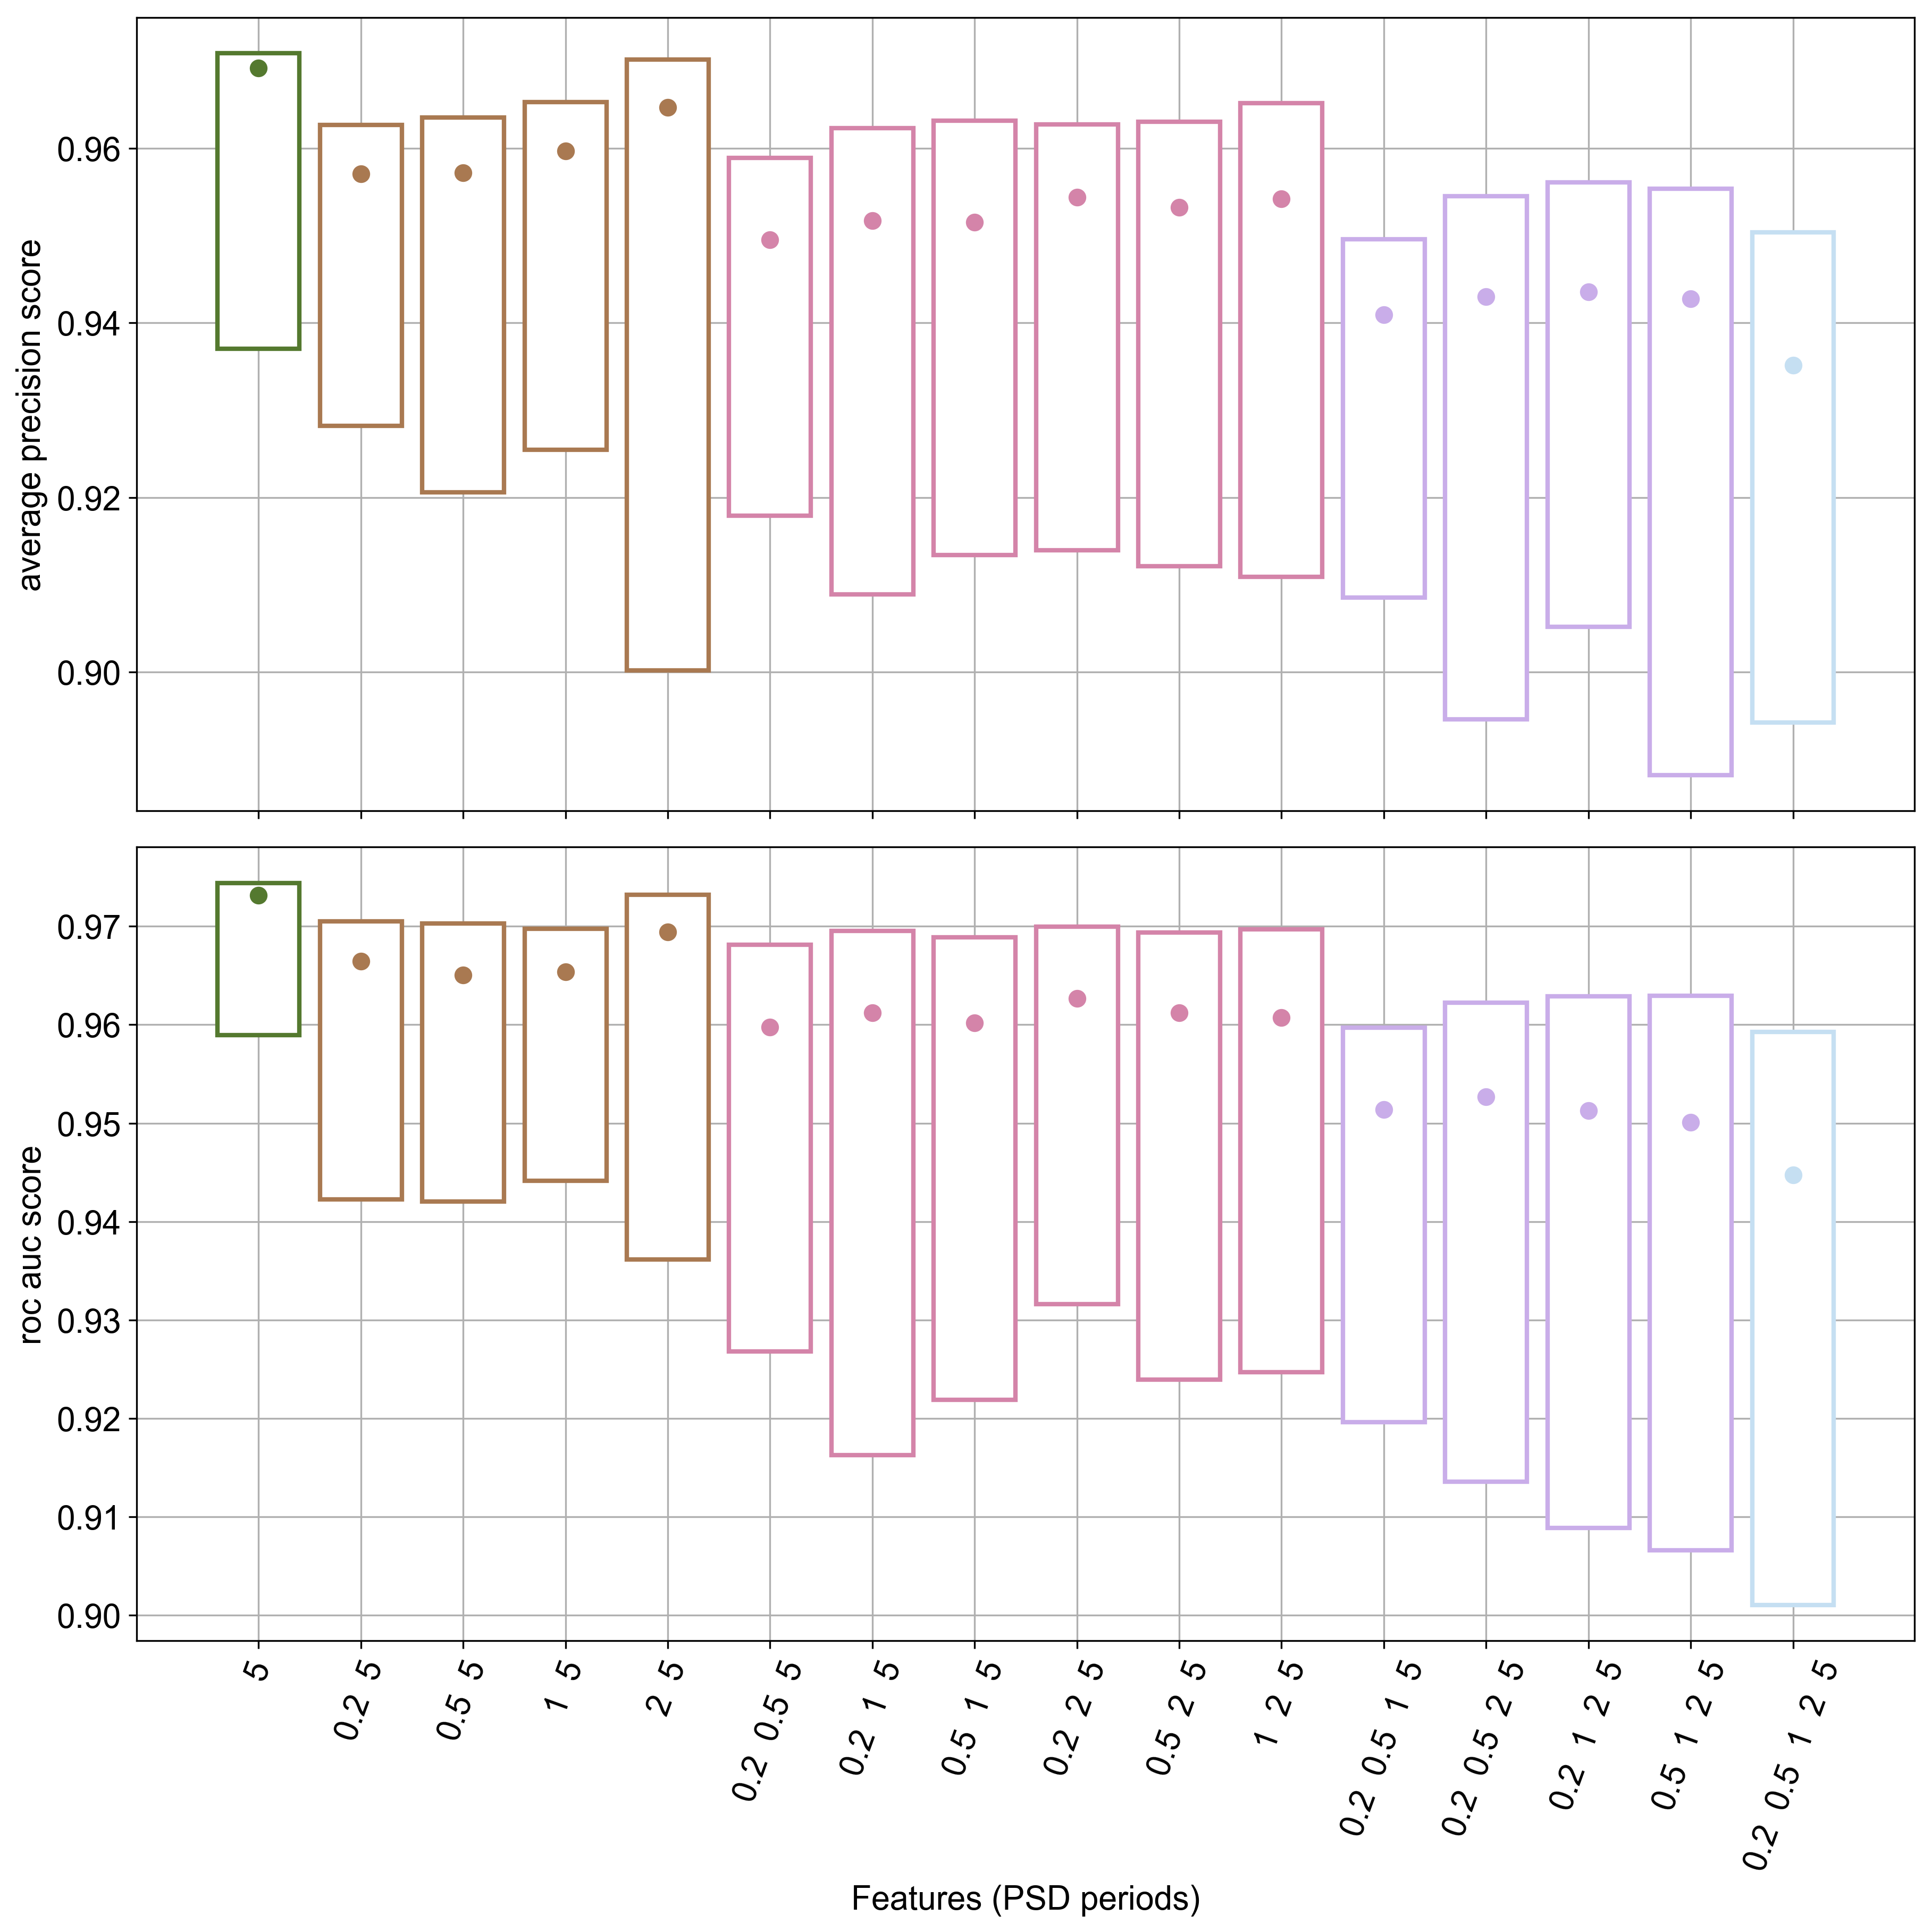

In [5]:
printhtml('<h3>Evaluation metrics (all classifiers) by number of features</h3>')
plot_feats_vs_evalmetrics(eval_df)

In [6]:
printhtml('<h3>Analyzing Hyperparameters keeping only evaluations using the single feature "psd@5sec"</h3>')
eval_df = eval_df[eval_df.feats == 'psd@5sec']

Analyzing Hyperparameters keeping only evaluations using only one feature "psd@5sec"

Score used: average_precision_score

Min average_precision_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.9371  0.9661  0.9643  0.9685  0.9685  0.9667
             100      0.9461  0.9665  0.9669  0.9696  0.9690  0.9670
             200      0.9570  0.9691  0.9692  0.9705  0.9697  0.9685

Median average_precision_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.9564  0.9662  0.9692  0.9702  0.9697  0.9673
             100      0.9580  0.9680  0.9705  0.9701  0.9702  0.9684
             200      0.9641  0.9692  0.9704  0.9706  0.9703  0.9695

Max average_precision_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.9677  0.9674  0.9704  0.9706  0.9699  0.9697
             100      0.9664  0.9702  0.9709  0.9704  0.9703  0.9701
             200      0.9642  0.9694  0.9706  0.9707  0.9704  0.9699

average_precision_score vs "max_samples" for diffetent "n_estimators" values

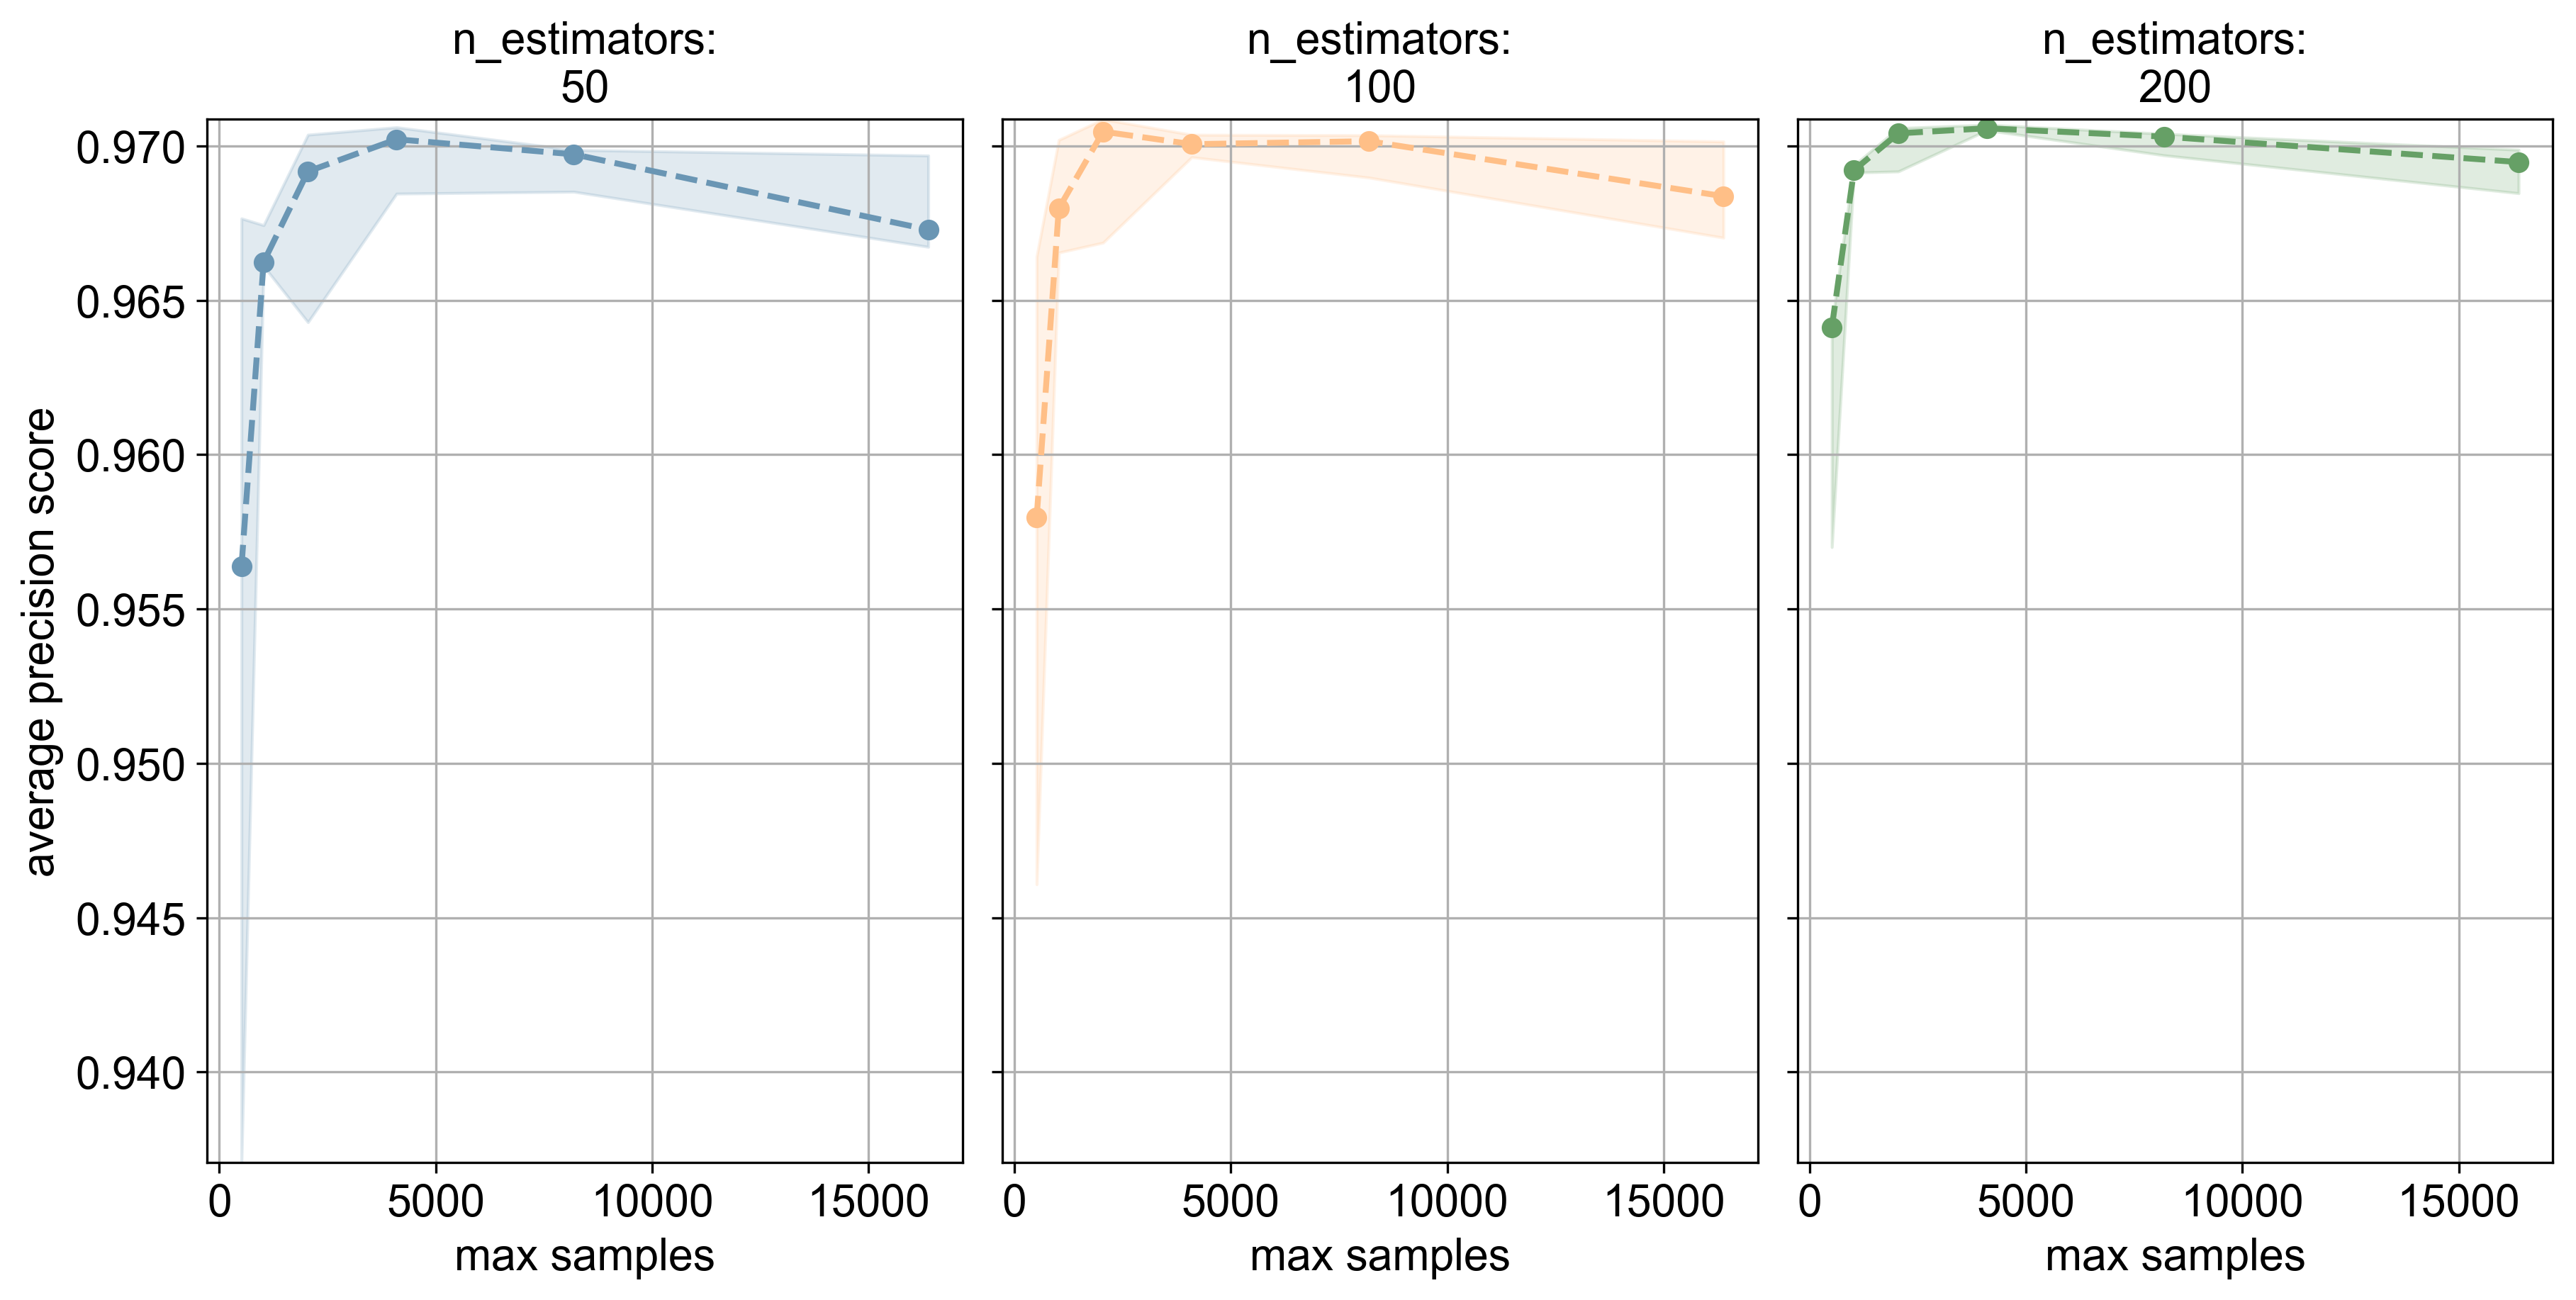

average_precision_score vs "n_estimators" for different "max_samples" values

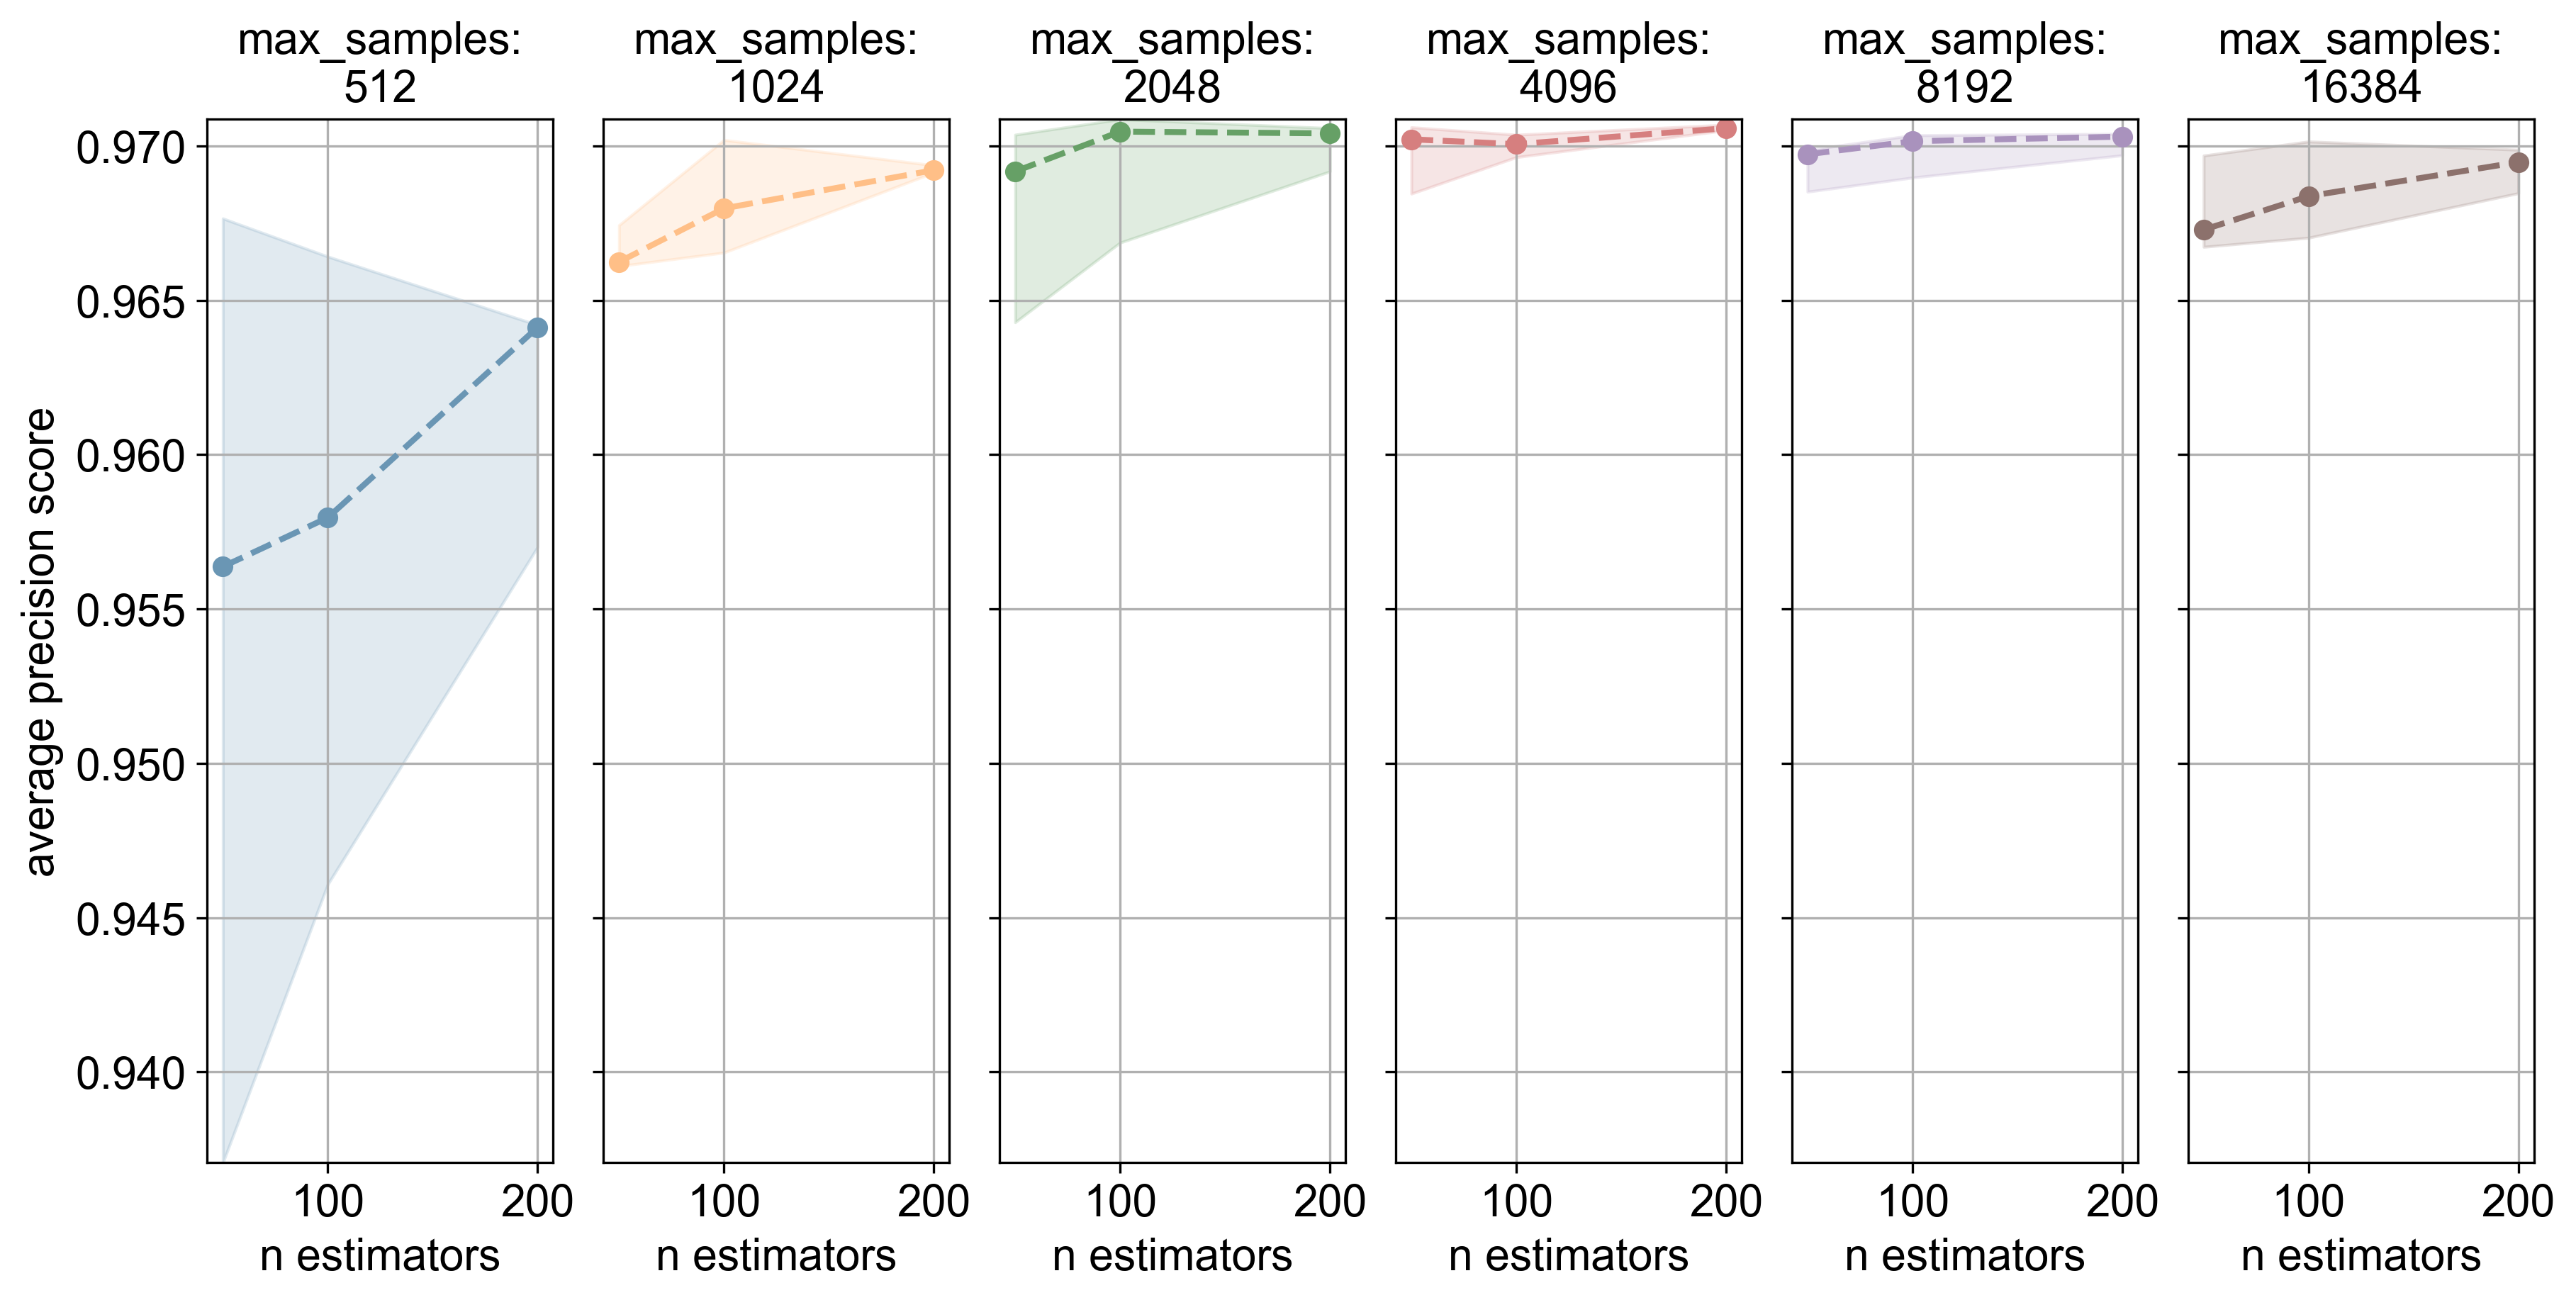

Score used: roc_auc_score

Min roc_auc_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.9589  0.9717  0.9705  0.9730  0.9726  0.9712
             100      0.9621  0.9719  0.9718  0.9733  0.9726  0.9713
             200      0.9668  0.9732  0.9731  0.9736  0.9732  0.9722

Median roc_auc_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.9661  0.9725  0.9734  0.9733  0.9729  0.9714
             100      0.9695  0.9731  0.9740  0.9734  0.9732  0.9720
             200      0.9711  0.9734  0.9738  0.9740  0.9735  0.9729

Max roc_auc_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.9733  0.9726  0.9740  0.9744  0.9736  0.9735
             100      0.9717  0.9738  0.9741  0.9739  0.9738  0.9735
             200      0.9715  0.9735  0.9741  0.9740  0.9738  0.9732

roc_auc_score vs "max_samples" for diffetent "n_estimators" values

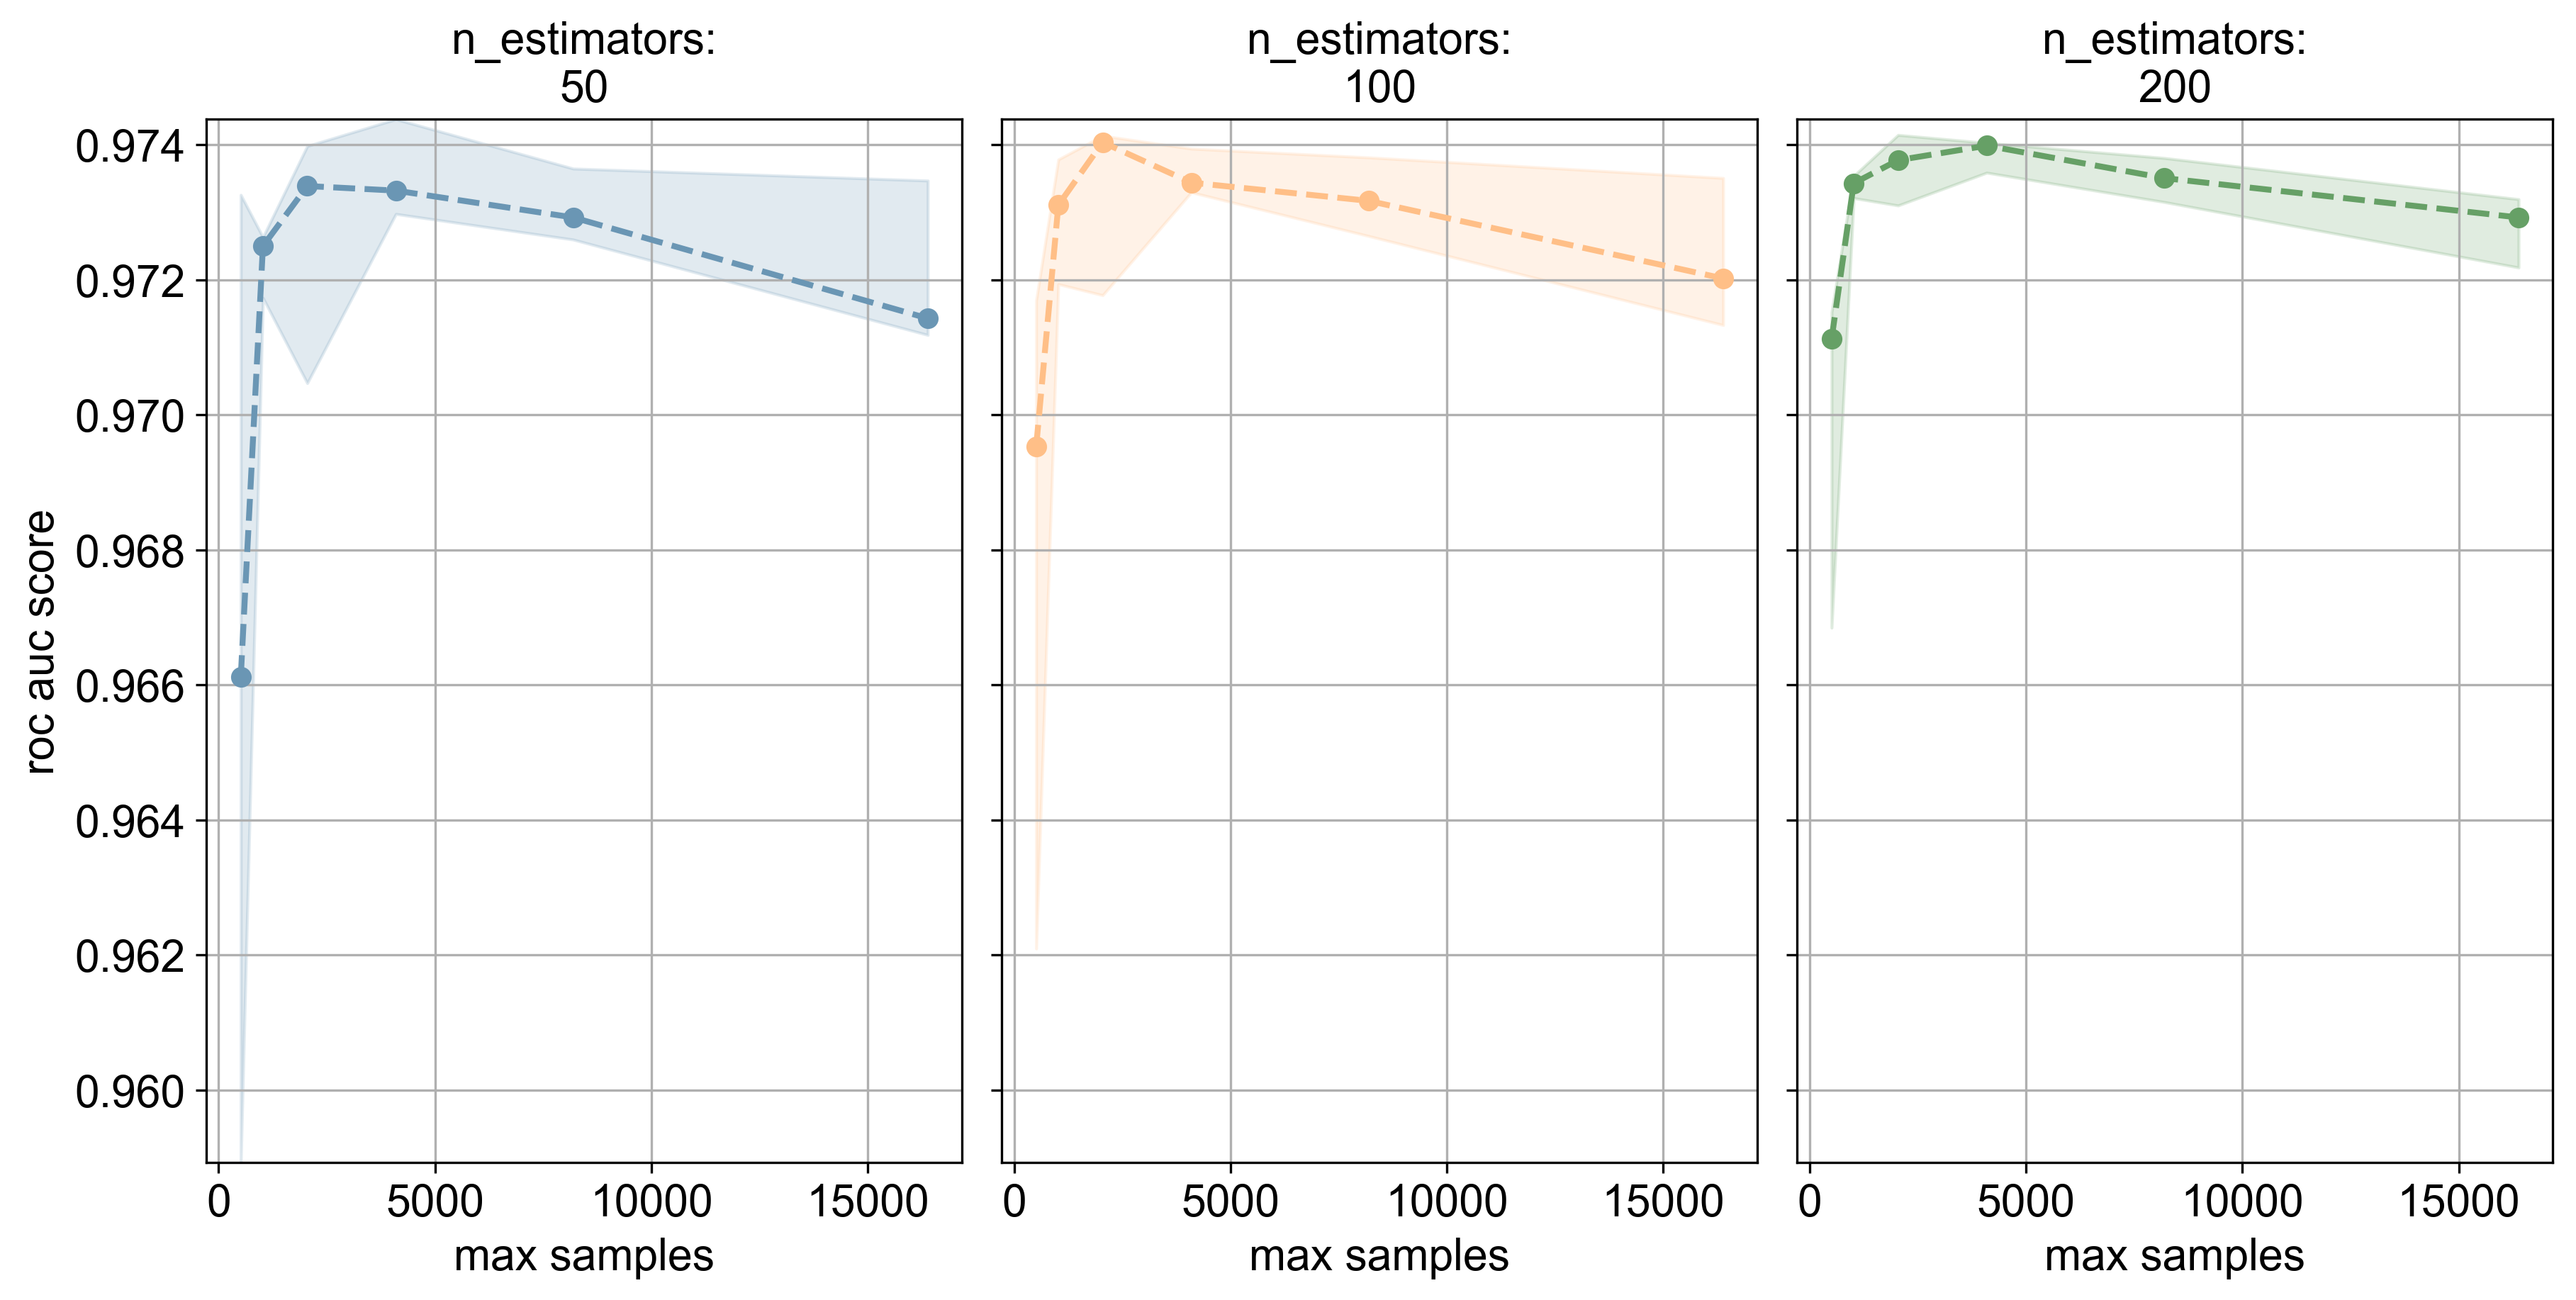

roc_auc_score vs "n_estimators" for different "max_samples" values

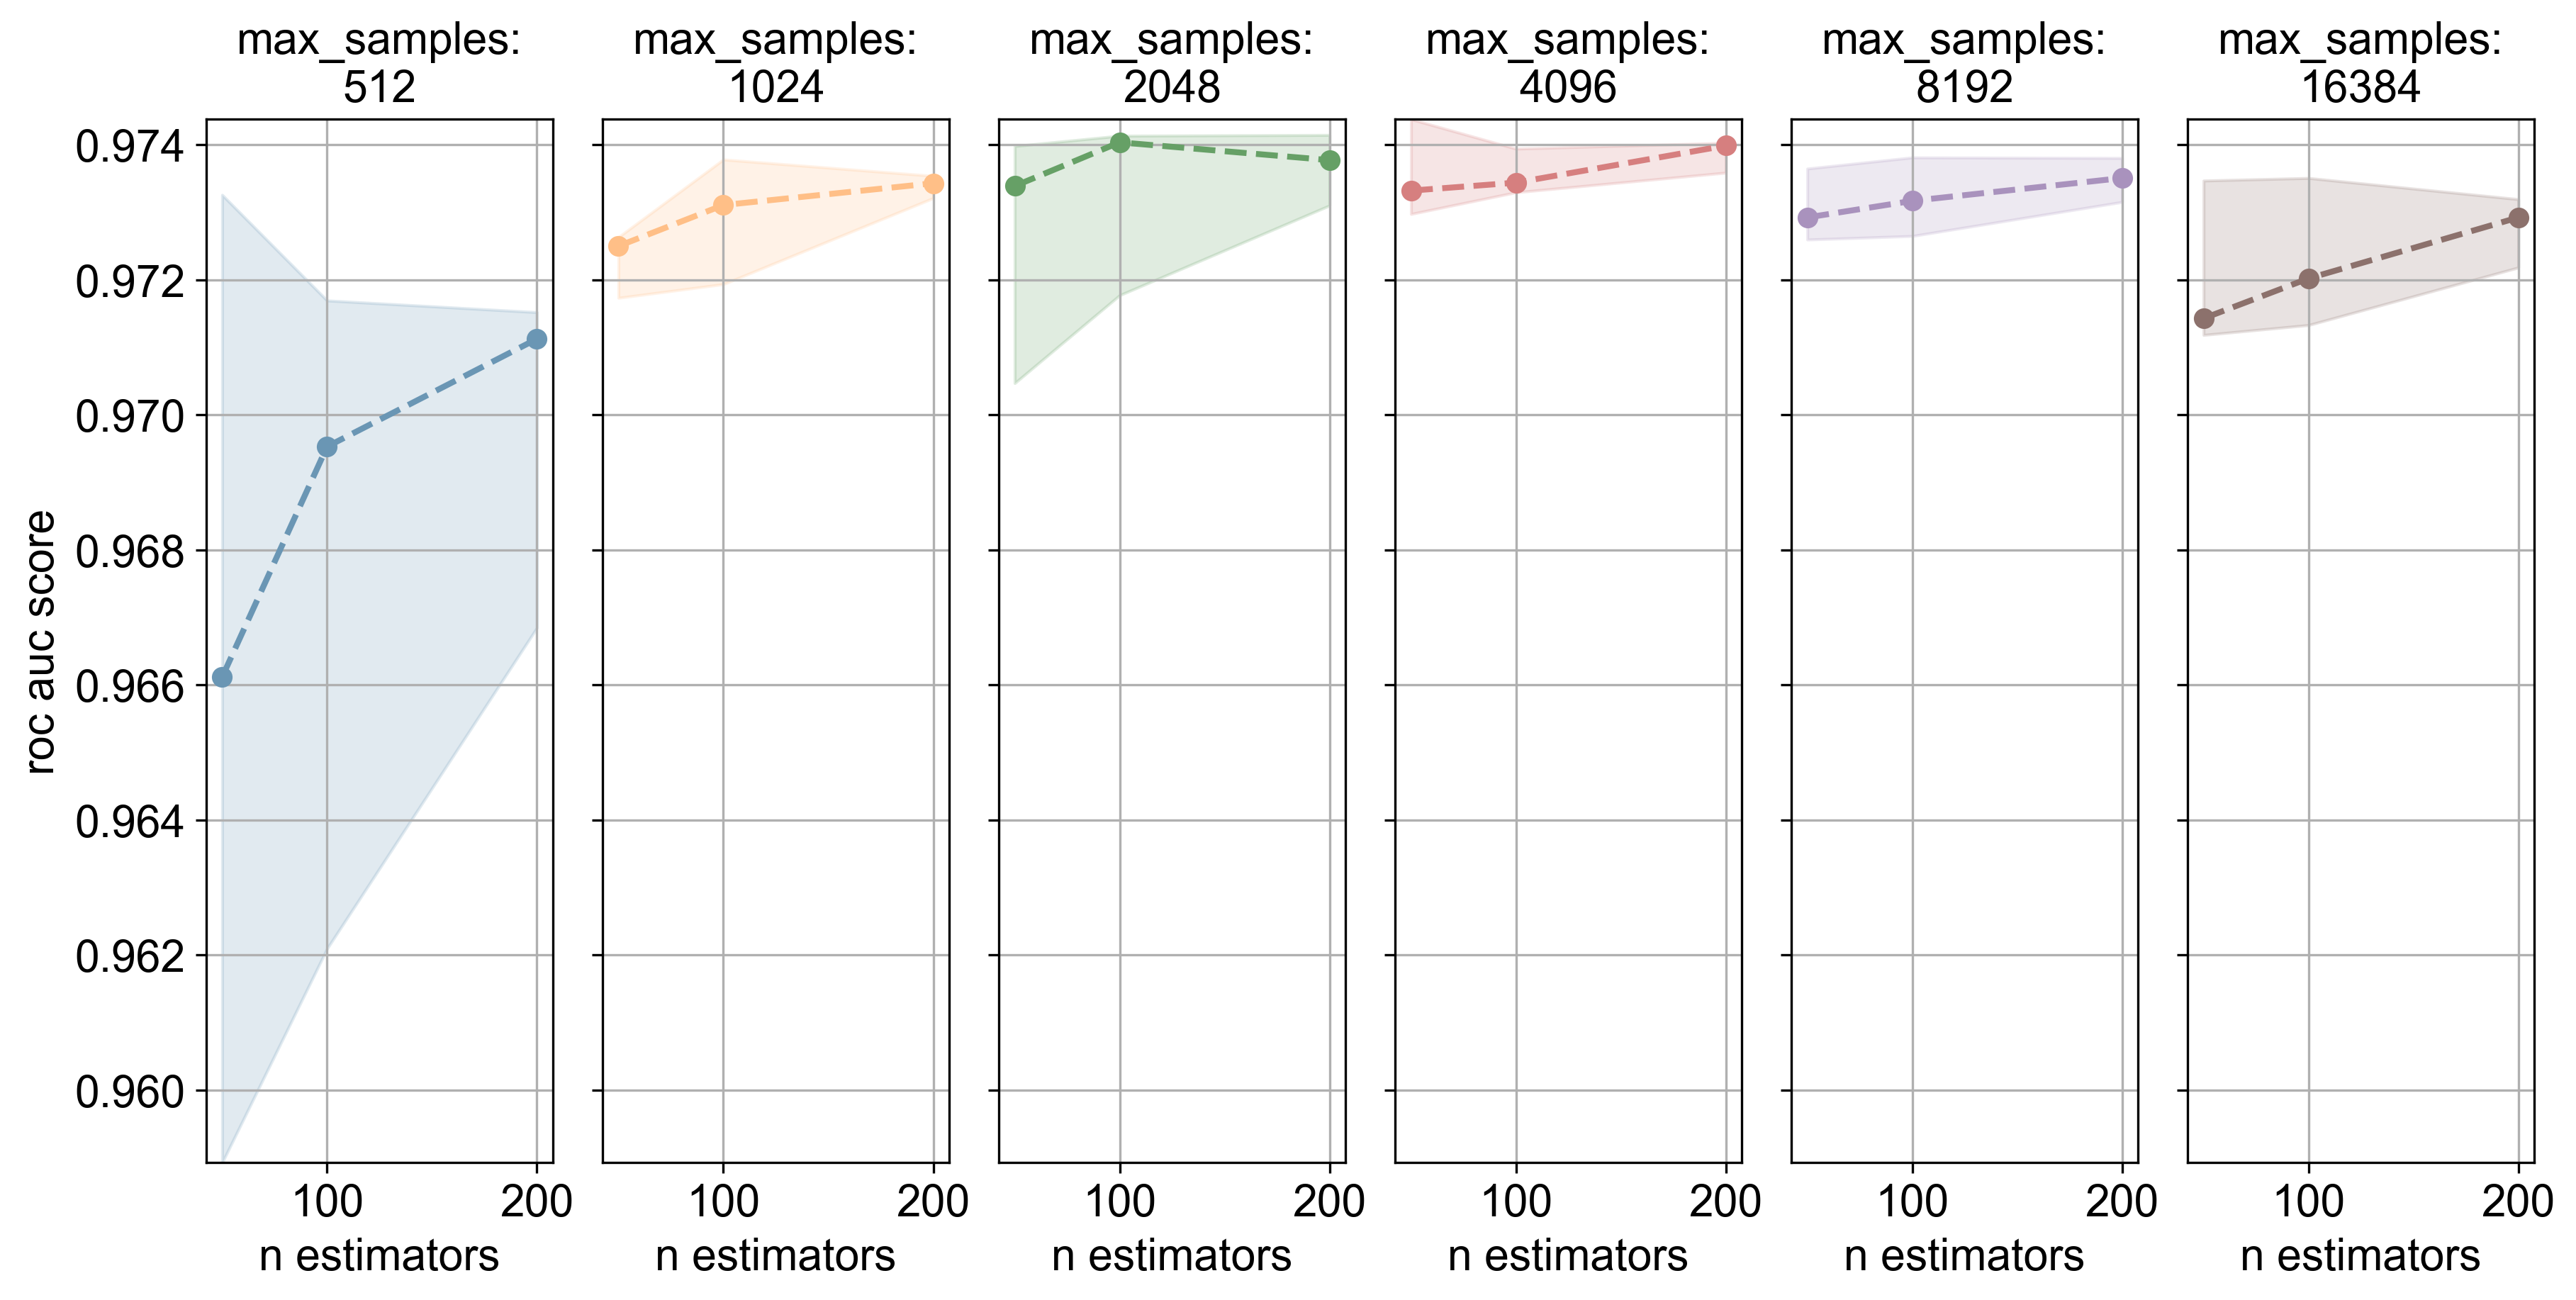

In [10]:
decimals = 4
plt.rcParams['figure.figsize'] = (12, 6)

for SCORE in ['average_precision_score', 'roc_auc_score']:
    print()
    printhtml('<h3>Score used: %s</h4>' % SCORE)
    dfmin, dfmedian, dfmax = get_hyperparam_dfs(eval_df, SCORE,
                                                n_estimators=np.unique(eval_df.n_estimators),
                                                max_samples=np.unique(eval_df.max_samples))

    printhtml('<h4>Min %s per hyperparameter (rounded to %d decimals)</h4>' % (SCORE, decimals))
    display(dfmin.round(4))
    printhtml('<h4>Median %s per hyperparameter (rounded to %d decimals)</h4>' % (SCORE, decimals))
    display(dfmedian.round(4))
    printhtml('<h4>Max %s per hyperparameter (rounded to %d decimals)</h4>' % (SCORE, decimals))
    display(dfmax.round(4))

    printhtml('<h3>%s vs "max_samples" for diffetent "n_estimators" values</h4>' % SCORE)
    plot_hyperparam_dfs(dfmin, dfmedian, dfmax, ylabel=SCORE.replace('_', ' '))
    printhtml('<h3>%s vs "n_estimators" for different "max_samples" values</h4>' % SCORE)
    plot_hyperparam_dfs(dfmin.T, dfmedian.T, dfmax.T, ylabel=SCORE.replace('_', ' '))

plt.rcParams['figure.figsize'] = (12, 12)

In [13]:
printhtml('<h3>taking models with median average precision score among all with the same hyperparameters</h3>')
eval_df2 = []
for _, _df in eval_df.groupby(['n_estimators', 'max_samples']):
    eval_df2.append(_df.sort_values('average_precision_score')[1:2])  # median
eval_df2 = pd.concat(eval_df2, axis=0, sort=False)

pd.set_option('display.max_rows', 500)
# display(eval_df.sort_values(['average_precision_score'], ascending=False).head(30))
display(eval_df2.sort_values(['average_precision_score'], ascending=False).head(30))

clf     feats  n_estimators  max_samples  random_state  \
5042  IsolationForest  psd@5sec           100         2048            42   
5052  IsolationForest  psd@5sec           200         4096            25   
5055  IsolationForest  psd@5sec            50         4096            11   
5046  IsolationForest  psd@5sec           200         2048            42   
5054  IsolationForest  psd@5sec           200         4096            42   
5053  IsolationForest  psd@5sec           200         4096            11   
5040  IsolationForest  psd@5sec           100         2048            11   
5043  IsolationForest  psd@5sec           200         2048            11   
5070  IsolationForest  psd@5sec           200         8192            11   
5045  IsolationForest  psd@5sec            50         2048            11   
5051  IsolationForest  psd@5sec           100         4096            42   
5067  IsolationForest  psd@5sec           100         8192            11   
5072  IsolationForest  psd@5sec           200         8192            42   
5057  IsolationForest  psd@5sec            50         4096            42   
5024  IsolationForest  psd@5sec           100         1024            42   
5069  IsolationForest  psd@5sec           100         8192            42   
5031  IsolationForest  psd@5sec           100        16384            11   
5049  IsolationForest  psd@5sec           100         4096            11   
5033  IsolationForest  psd@5sec           200        16384            11   
5073  IsolationForest  psd@5sec            50         8192            11   
5075  IsolationForest  psd@5sec            50         8192            42   
5071  IsolationForest  psd@5sec           200         8192            25   
5037  IsolationForest  psd@5sec            50        16384            11   
5050  IsolationForest  psd@5sec           100         4096            25   
5036  IsolationForest  psd@5sec           200        16384            42   
5027  IsolationForest  psd@5sec           200         1024            42   
5025  IsolationForest  psd@5sec           200         1024            11   
5048  IsolationForest  psd@5sec            50         2048            42   
5044  IsolationForest  psd@5sec           200         2048            25   
5026  IsolationForest  psd@5sec           200         1024            25   

      roc_auc_score  average_precision_score  log_loss  best_th_pr_curve  \
5042       0.974132                 0.970866  0.606184          0.746330   
5052       0.974026                 0.970687  0.588646          0.718142   
5055       0.974377                 0.970605  0.587202          0.726551   
5046       0.974144                 0.970577  0.607408          0.746689   
5054       0.973585                 0.970573  0.587802          0.715107   
5053       0.973985                 0.970509  0.590698          0.718866   
5040       0.974035                 0.970464  0.610812          0.756818   
5043       0.973771                 0.970408  0.610380          0.746150   
5070       0.973803                 0.970393  0.579433          0.688365   
5045       0.973979                 0.970364  0.614826          0.757912   
5051       0.973295                 0.970362  0.583340          0.713018   
5067       0.973810                 0.970347  0.582303          0.696299   
5072       0.973506                 0.970302  0.580470          0.686190   
5057       0.973320                 0.970216  0.590197          0.709309   
5024       0.973780                 0.970194  0.635295          0.777680   
5069       0.973168                 0.970154  0.582394          0.679810   
5031       0.973506                 0.970144  0.568675          0.675488   
5049       0.973940                 0.970058  0.588319          0.726503   
5033       0.973192                 0.969877  0.572371          0.668579   
5073       0.973645                 0.969870  0.582023          0.694817   
5075       0.972922                 0.969730  0.591655          0

clf     feats  n_estimators  max_samples  random_state  \
5054  IsolationForest  psd@5sec           200         4096            42   
5040  IsolationForest  psd@5sec           100         2048            11   
5043  IsolationForest  psd@5sec           200         2048            11   
5072  IsolationForest  psd@5sec           200         8192            42   
5057  IsolationForest  psd@5sec            50         4096            42   
5069  IsolationForest  psd@5sec           100         8192            42   
5049  IsolationForest  psd@5sec           100         4096            11   
5075  IsolationForest  psd@5sec            50         8192            42   
5036  IsolationForest  psd@5sec           200        16384            42   
5025  IsolationForest  psd@5sec           200         1024            11   
5048  IsolationForest  psd@5sec            50         2048            42   
5034  IsolationForest  psd@5sec           100        16384            42   
5021  IsolationForest  psd@5sec           100         1024            11   
5039  IsolationForest  psd@5sec            50        16384            42   
5029  IsolationForest  psd@5sec            50         1024            25   
5061  IsolationForest  psd@5sec           200          512            11   
5058  IsolationForest  psd@5sec           100          512            11   
5066  IsolationForest  psd@5sec            50          512            42   

      roc_auc_score  average_precision_score  log_loss  best_th_pr_curve  \
5054       0.973585                 0.970573  0.587802          0.715107   
5040       0.974035                 0.970464  0.610812          0.756818   
5043       0.973771                 0.970408  0.610380          0.746150   
5072       0.973506                 0.970302  0.580470          0.686190   
5057       0.973320                 0.970216  0.590197          0.709309   
5069       0.973168                 0.970154  0.582394          0.679810   
5049       0.973940                 0.970058  0.588319          0.726503   
5075       0.972922                 0.969730  0.591655          0.681607   
5036       0.972922                 0.969477  0.576681          0.668238   
5025       0.973538                 0.969215  0.632467          0.771159   
5048       0.973388                 0.969175  0.617847          0.742747   
5034       0.972020                 0.968372  0.578518          0.662787   
5021       0.973106                 0.967977  0.631382          0.769510   
5039       0.971182                 0.967287  0.580767          0.670643   
5029       0.972498                 0.966243  0.631457          0.760565   
5061       0.971519                 0.964121  0.666800          0.775491   
5058       0.969529                 0.957958  0.671435          0.772101   
5066       0.966118                 0.956370  0.664832          0.751356   

     behaviour  best_th_roc_curve contamination  \
5054       new           0.712756          auto   
5040       new           0.750291          auto   
5043       new           0.743104          auto   
5072       new           0.685775          auto   
5057       new           0.703726          auto   
5069       new           0.678383          auto   
5049       new           0.725229          auto   
5075       new           0.680507          auto   
5036       new           0.665883          auto   
5025       new           0.766248          auto   
5048       new           0.736341          auto   
5034       new           0.662041          auto   
5021       new           0.754096          auto   
5039       new           0.662516          auto   
5029       new           0.748512          auto   
5061       new           0.763341          auto   
5058       new           0.771181          auto   
5066       new           0.738042          auto   

                                                                                                                                                              

In [46]:

# from share import plot_1dclf_scores_vs_psdperiods, plot_freq_distribution, plot_pre_rec_fscore

# load pred_dfs:
# pred_dfs = get_pred_dfs(_eval_df[eval_df2.n_estimators==200].sort_values(['max_samples']))
# plot_prediction_per_maxsamples(pred_dfs)


def plot_prediction_per_maxsamples(pred_dfs):
    
    import importlib
    from sod.jupyter import share # our user defined functions
    importlib.reload(share)

    # printhtml('<h3>Summary plots n_estimators=200 only (and random_state=11)</h3>')
    plt.rcParams['figure.figsize'] = (12, 20)
    PETTERSON_PERIOD = 5  # set to 0 to ignore

    rows, cols = len(pred_dfs), 4
    fig = plt.figure(constrained_layout=True)
    gsp = fig.add_gridspec(rows, cols, width_ratios=[1,5,5,5])
    colors = get_colors(len(pd.unique([_.max_samples for _ in pred_dfs.keys()])))
    psdperiods = np.arange(-230, 0, 0.1)

    axs_all = [[], [], []]
    for idx, (rowtuple, pred_df) in enumerate(pred_dfs.items()):
        title= "(max_s=%s)" % (rowtuple.max_samples)

        aps, p, r, th, f = share.EVALMETRICS.computeall(pred_df, share.EVALMETRICS.APS,
                                                        share.EVALMETRICS.PMAX, share.EVALMETRICS.RMAX,
                                                        share.EVALMETRICS.BEST_TH_PR, share.EVALMETRICS.F1MAX)

        axs = fig.add_subplot(gsp[idx, 0])
        text = '$\phi$: %d\nAPS: %.3f\nP(%.2f): %.3f\nR(%.2f): %.3f\nF(%.2f): %.3f' \
            % (rowtuple.max_samples, aps, th, p, th, r, th, f)
        axs.text(0.5, 0.5, text,
                 ha='right', va='center')  # size=24, 
        axs.set_axis_off()
        
        
        axs = fig.add_subplot(gsp[idx, 1])
        axs = share.plot_freq_distribution(pred_df, axs, bins=np.arange(0.4, .9, 0.05), title='',
                                           mp_hist_kwargs={'color': ['white', colors[idx]], 'edgecolor':colors[idx]})
        axs_all[0].append(axs)

        axs = fig.add_subplot(gsp[idx, 2])
        axs = share.plot_pre_rec_fscore(pred_df, axs, title='', mp_plot_kwargs={'color': colors[idx]})
        axs_all[1].append(axs)

        axs = fig.add_subplot(gsp[idx, 3])
        clf = load_clf(dirname(rowtuple.relative_filepath) + '.sklmodel')
        scores = -clf.score_samples(psdperiods.reshape(len(psdperiods), 1))
        # plot scores:
        axs.plot(psdperiods, scores, color=colors[idx], linewidth=2)
        # plot petterson:
        pbounds = get_petterson_bounds(PETTERSON_PERIOD)
        axs.axvline(pbounds[0], linestyle=':', linewidth=2)
        axs.axvline(pbounds[1], linestyle=':', linewidth=2)
        # plot shaded areas between 0.5 and score optimizing f1score:
        indices1 = share.argwhere_array_equals_value(scores, th)
        indices2 = share.argwhere_array_equals_value(scores, 0.5)
        axs.axvspan(psdperiods[indices1[0]], psdperiods[indices2[0]], alpha=0.2, linestyle='--', linewidth=0, color=colors[idx])
        axs.axvspan(psdperiods[indices2[-1]], psdperiods[indices1[-1]], alpha=0.2, linestyle='--', linewidth=0, color=colors[idx])
        axs.grid()
        axs_all[2].append(axs)


    for axes_ in axs_all:
        samex(axes_)
        samey(axes_)

    plt.show()
#    rows, cols = grid4plot(len(pred_dfs), ncols=ncols)
#    fig = plt.figure(constrained_layout=True)
#    gsp = fig.add_gridspec(rows, cols)

Plotting detailed model predictions with n_estimators=50

[●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●] 100.0% 0:00:00

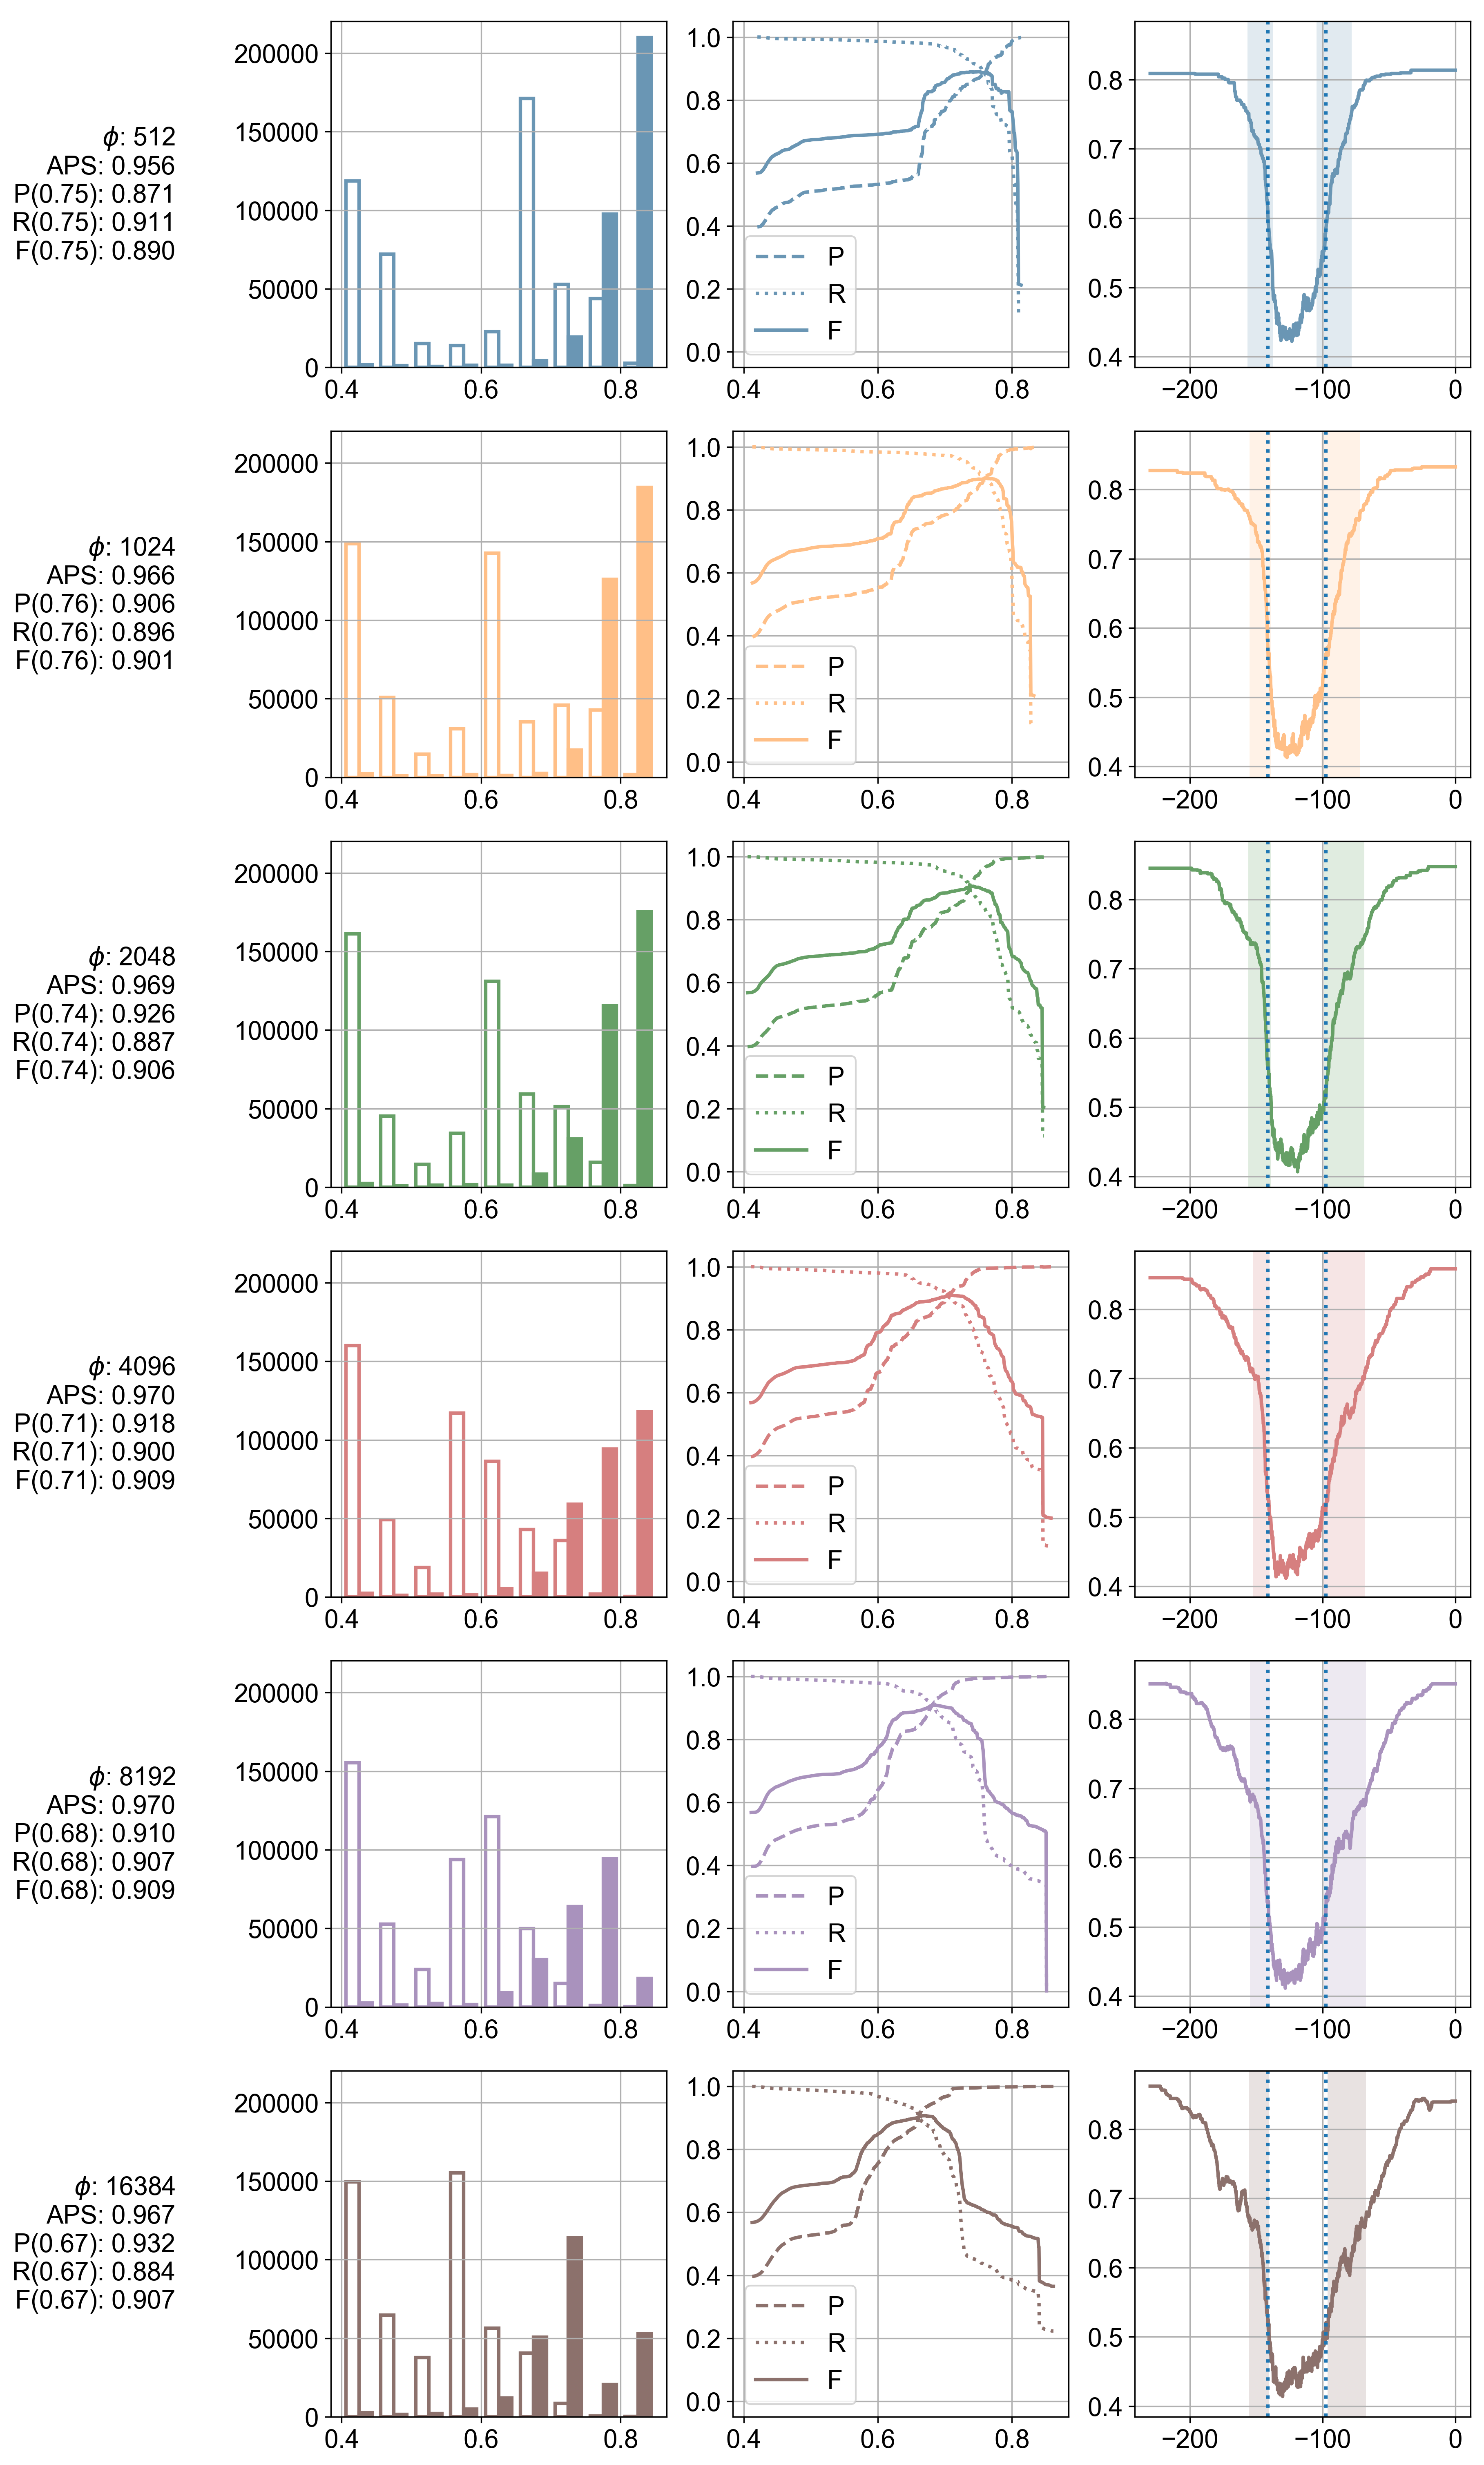

Plotting detailed model predictions with n_estimators=100

[●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●] 100.0% 0:00:00

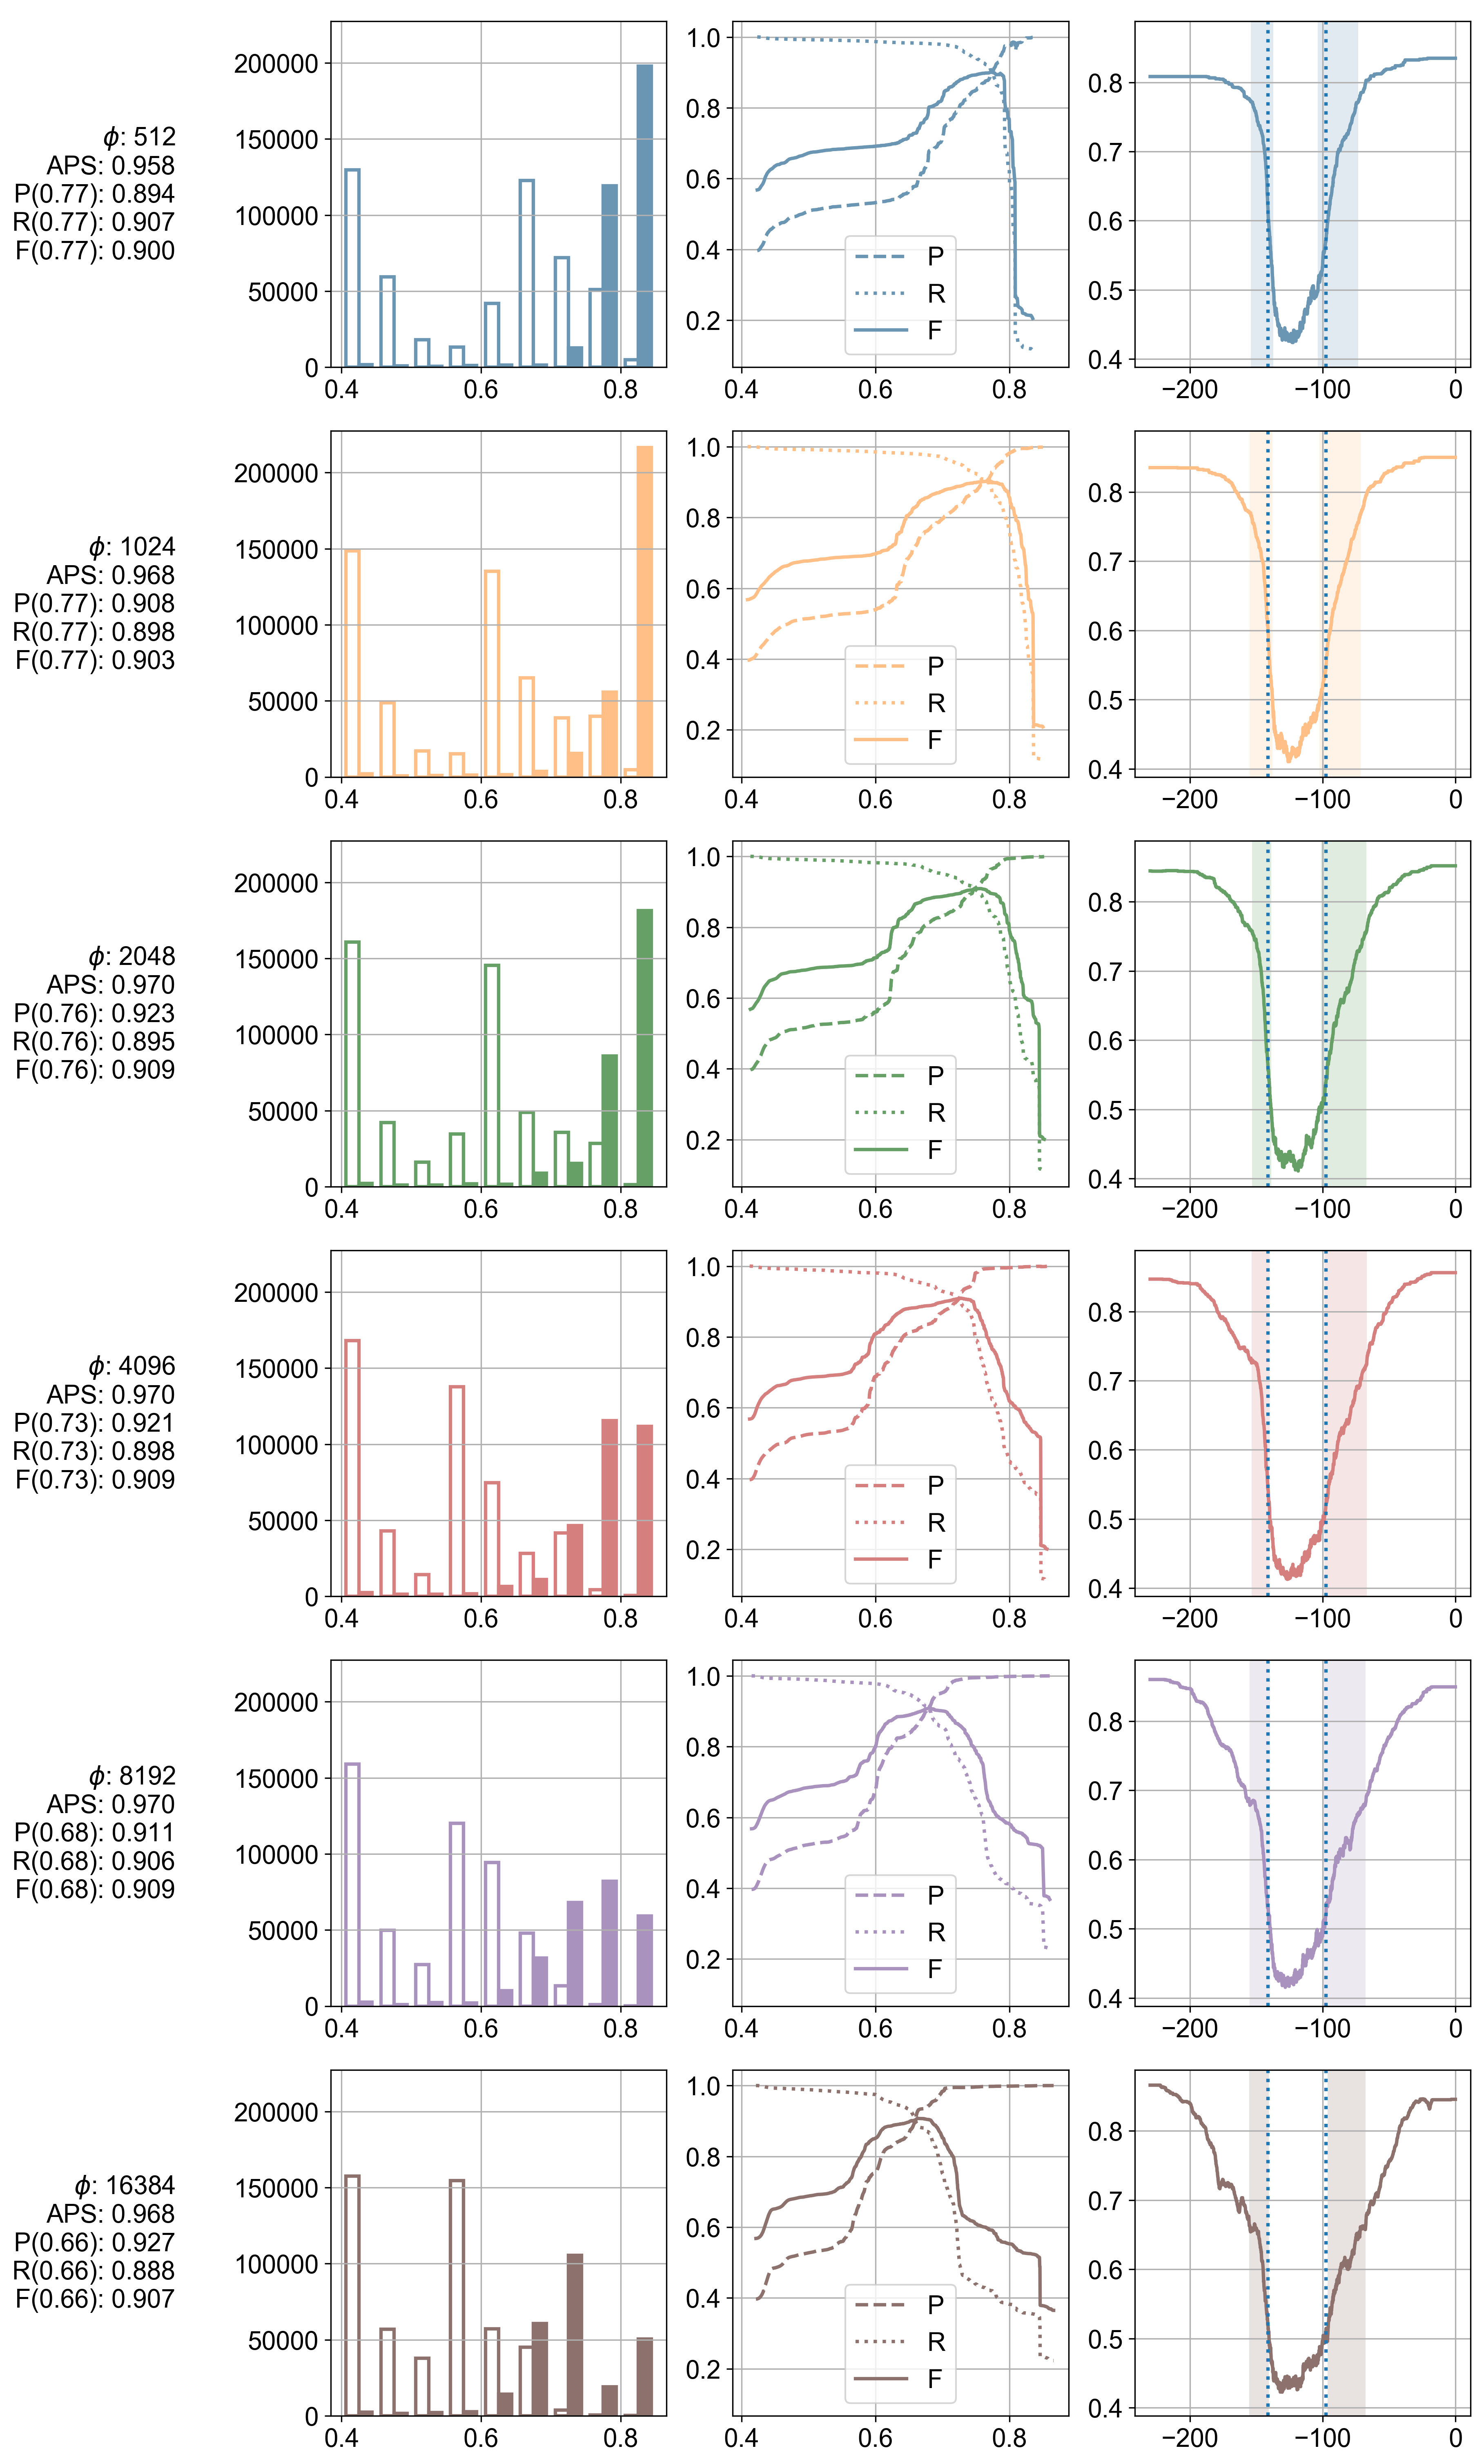

Plotting detailed model predictions with n_estimators=200

[●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●] 100.0% 0:00:00

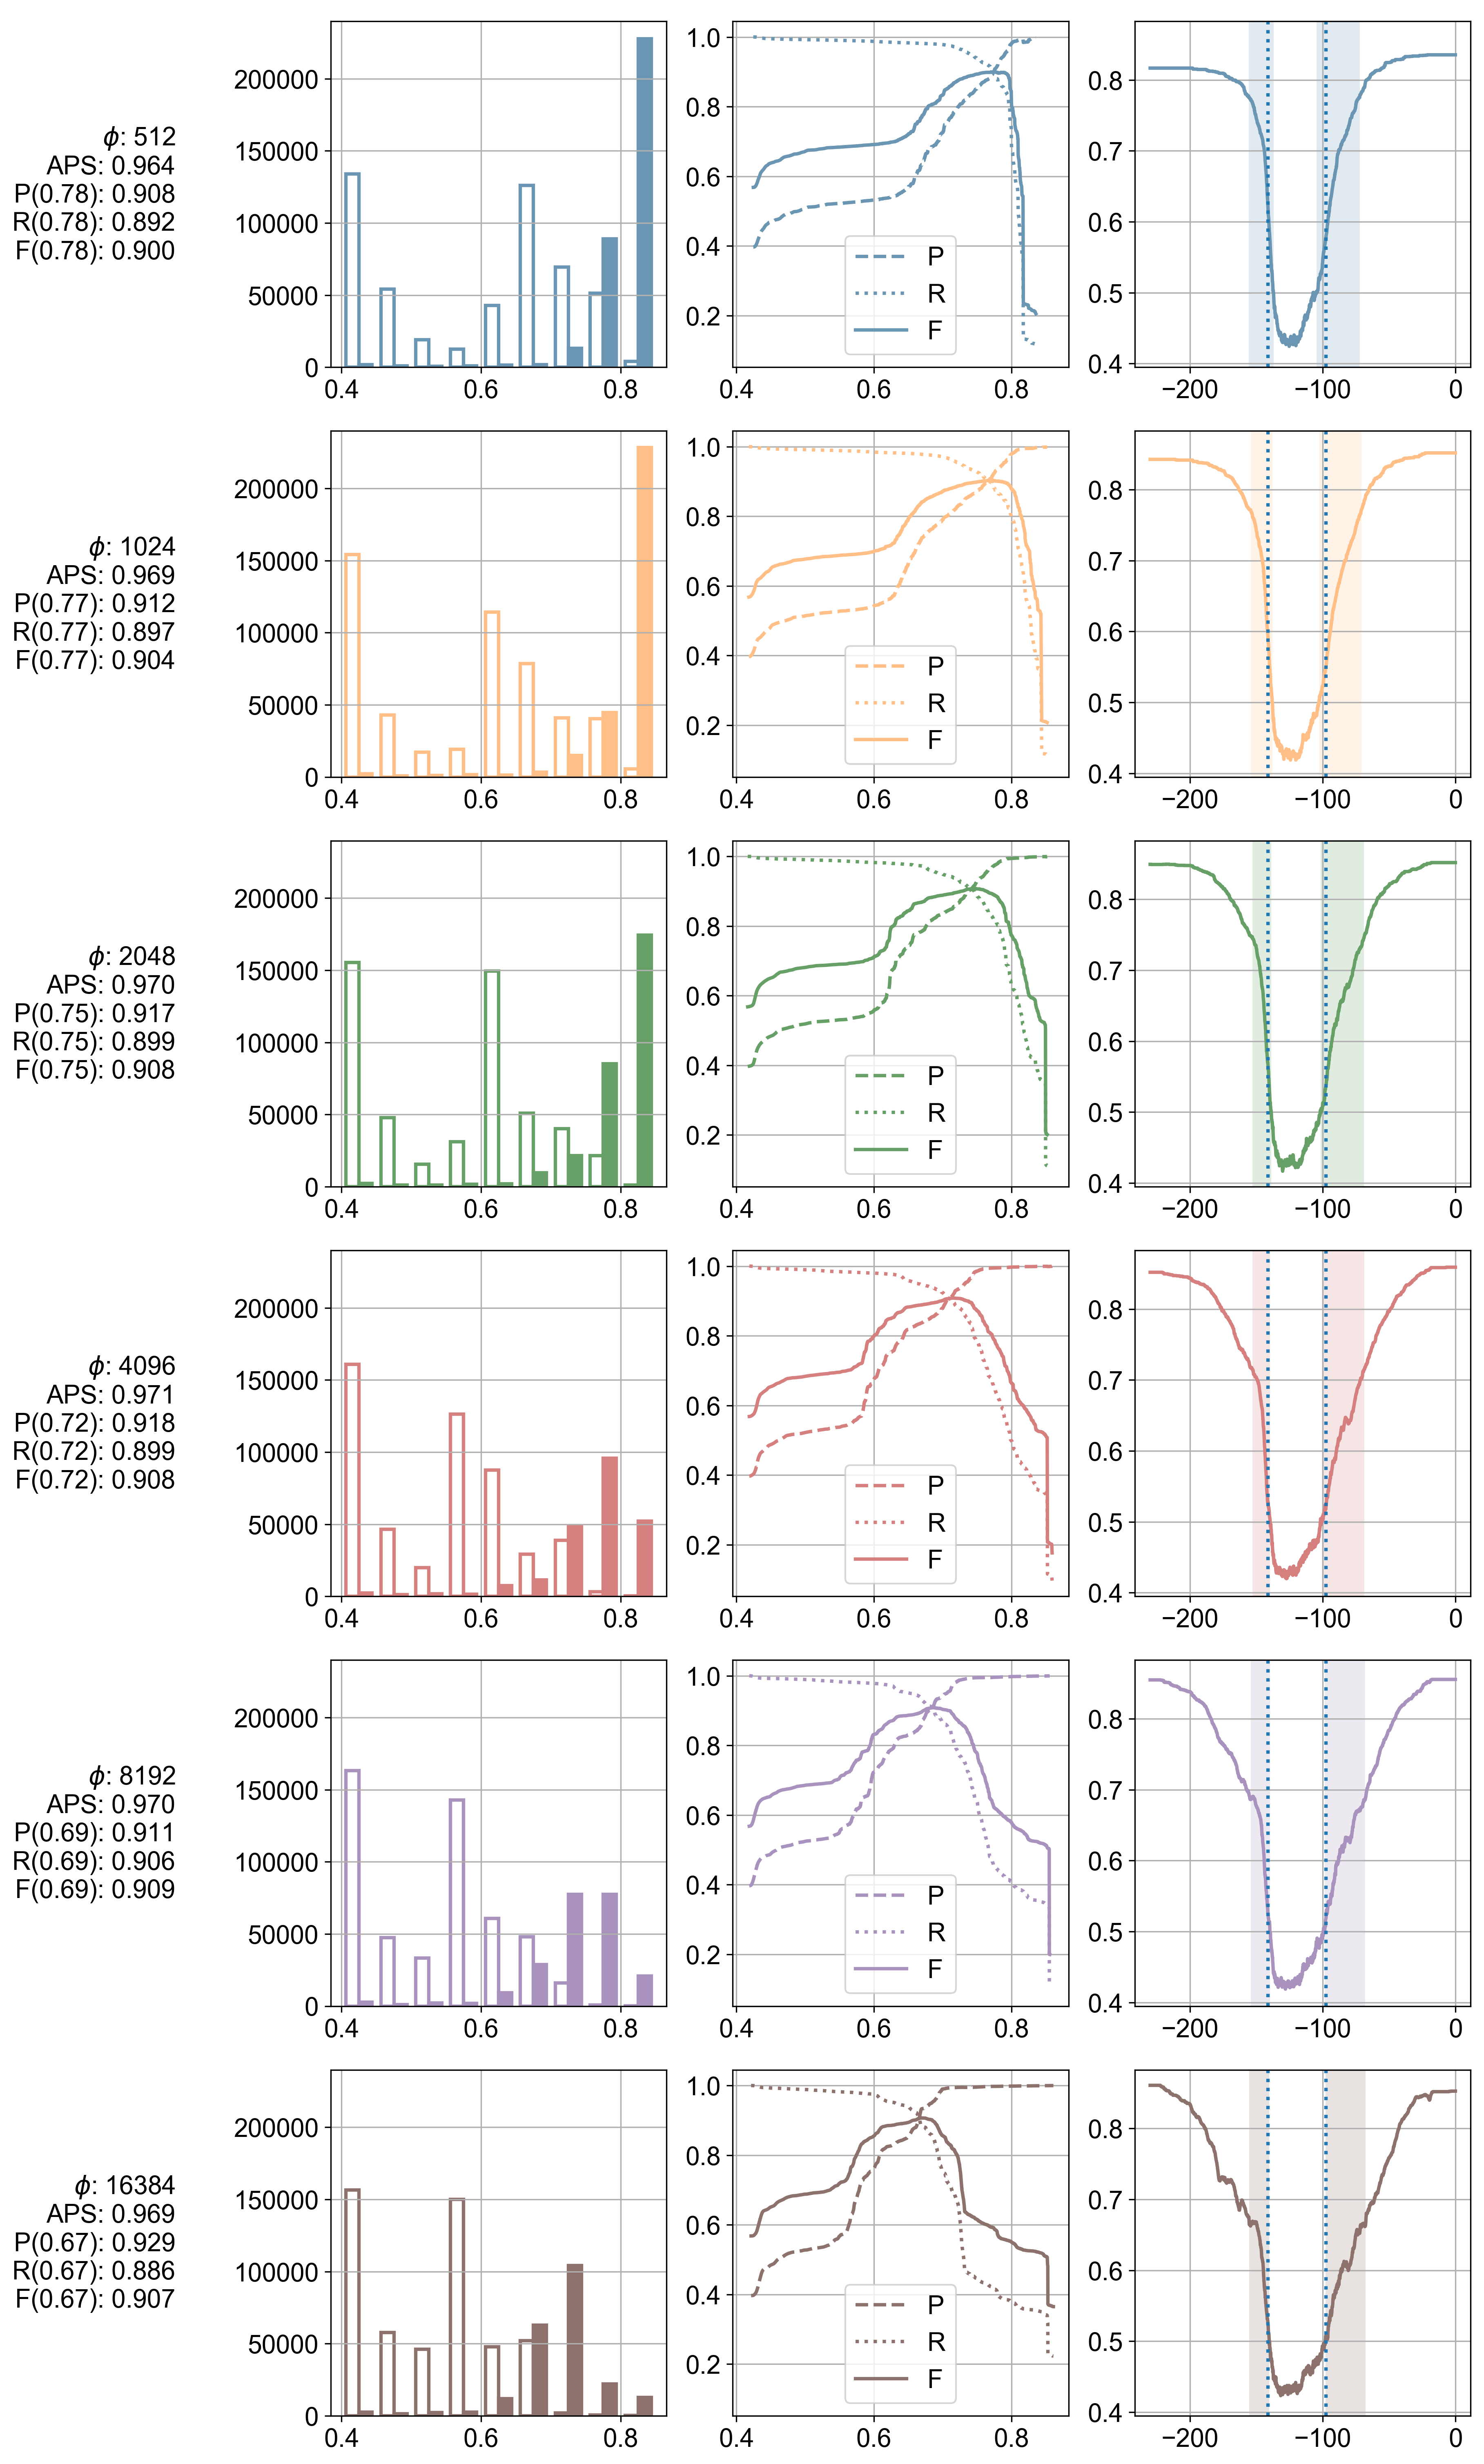

In [47]:
for nest in [50, 100, 200]:
    print()
    printhtml('<h3>Plotting detailed model predictions with n_estimators=%d</h3>' % nest)
    pred_dfs = get_pred_dfs(eval_df2[eval_df2.n_estimators == nest])
    plot_prediction_per_maxsamples(pred_dfs)

In [ ]:









raise